# Analyse statistique de données sportives

## Exploration des variables Defensive

In [1]:
install.packages("corrplot")

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ana\AppData\Local\Temp\RtmpMRPWLm\downloaded_packages


In [2]:
install.packages("FactoMineR")

package 'FactoMineR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ana\AppData\Local\Temp\RtmpMRPWLm\downloaded_packages


In [8]:
def <- read.csv("./Donnees/Defensive.csv", header = TRUE,sep="\t", row.names=1)
head(def)

,Tackles_TotalTackles,Tackles_DribbledPast,Tackles_TotalAttemptedTackles,Interception_Total,Fouls_Fouled,Fouls_Fouls,Cards_Yellow,Cards_Red,OffSides_CaughtOffside,Clearances_Total,Blocks_ShotsBlocked,Blocks_CrossesBlocked,Blocks_PassesBlocked,Saves_Total,Saves_SixYardBox,Saves_PenaltyArea,Saves_OutOfBox,Pts
PSG19,18.4,9.0,27.5,9.0,11.7,12.05,1.7,0.1,2.4,12.9,2.5,1.4,6.4,2.6,0.2,1.2,1.2,91
Lyon19,16.8,6.9,23.6,9.6,12.3,11.70,1.4,0.1,2.5,16.1,3.6,2.0,7.1,2.8,0.2,1.4,1.2,72
Lille19,16.5,8.4,24.9,10.2,13.4,12.60,1.8,0.1,1.0,17.9,2.8,2.3,7.1,2.4,0.1,1.4,0.9,72
Montpellier19,20.0,9.8,29.8,12.8,12.6,14.10,1.6,0.1,1.5,18.6,2.8,1.7,8.1,2.7,0.1,1.4,1.2,59
Saint-Etienne19,17.7,9.3,27.0,11.6,12.0,11.90,1.6,0.2,1.6,19.3,2.6,1.6,6.9,3.0,0.1,1.8,1.1,66
Marseille19,20.5,10.0,30.5,10.6,12.0,13.20,2.2,0.2,1.2,17.0,2.6,1.5,6.5,2.3,0.1,1.3,0.9,61


In [9]:
str(def)

'data.frame':	200 obs. of  18 variables:
 $ Tackles_TotalTackles         : num  18.4 16.8 16.5 20 17.7 20.5 17.4 19.3 17.2 17.1 ...
 $ Tackles_DribbledPast         : num  9 6.9 8.4 9.8 9.3 10 8.7 11.4 9.4 8.2 ...
 $ Tackles_TotalAttemptedTackles: num  27.5 23.6 24.9 29.8 27 30.5 26.1 30.6 26.6 25.3 ...
 $ Interception_Total           : num  9 9.6 10.2 12.8 11.6 10.6 11.8 11.7 10.2 11.3 ...
 $ Fouls_Fouled                 : num  11.7 12.3 13.4 12.6 12 12 13.6 13 12.8 10.6 ...
 $ Fouls_Fouls                  : num  12.1 11.7 12.6 14.1 11.9 ...
 $ Cards_Yellow                 : num  1.7 1.4 1.8 1.6 1.6 2.2 1.9 1.8 1.7 1.8 ...
 $ Cards_Red                    : num  0.1 0.1 0.1 0.1 0.2 0.2 0.1 0.1 0.1 0.1 ...
 $ OffSides_CaughtOffside       : num  2.4 2.5 1 1.5 1.6 1.2 1.1 1.1 1.6 1.1 ...
 $ Clearances_Total             : num  12.9 16.1 17.9 18.6 19.3 17 19.3 20.4 19.2 18.4 ...
 $ Blocks_ShotsBlocked          : num  2.5 3.6 2.8 2.8 2.6 2.6 2.8 3.1 3.1 3.3 ...
 $ Blocks_CrossesBlocked       

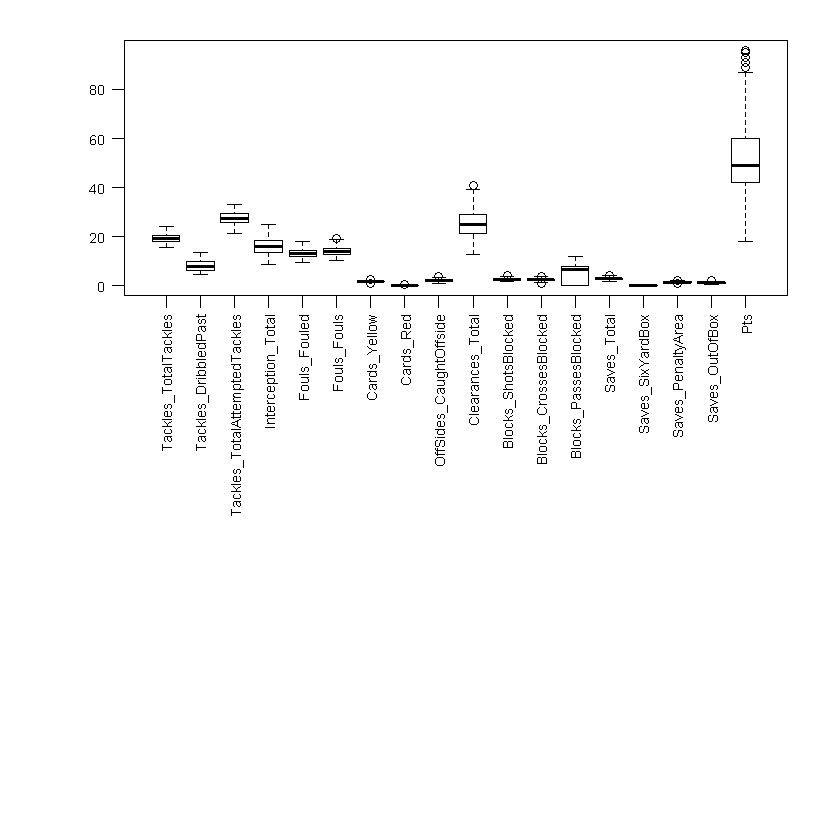

In [10]:
par(mfrow=c(2,1),oma = c(0,0, 0, 0), mgp = c(0, 0.8, 0), mar = 1.2 + c(4,4, .5,1), cex.main=1,cex.lab=0.4,cex.axis=0.7)
boxplot(def,las=2)

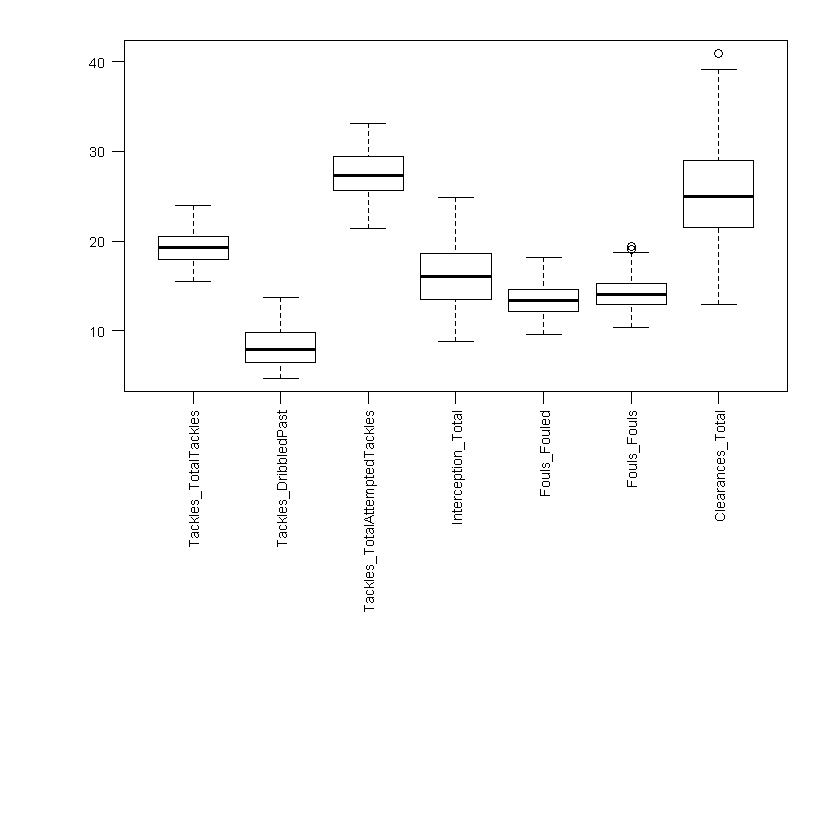

In [11]:
par(mfrow=c(2,1),oma = c(0,0, 0, 0), mgp = c(0, 0.8, 0), mar = 1.2 + c(0,4, .5,1), cex.main=1,cex.lab=0.4,cex.axis=0.7)
boxplot(def[,c(1:6,10)],las=2)

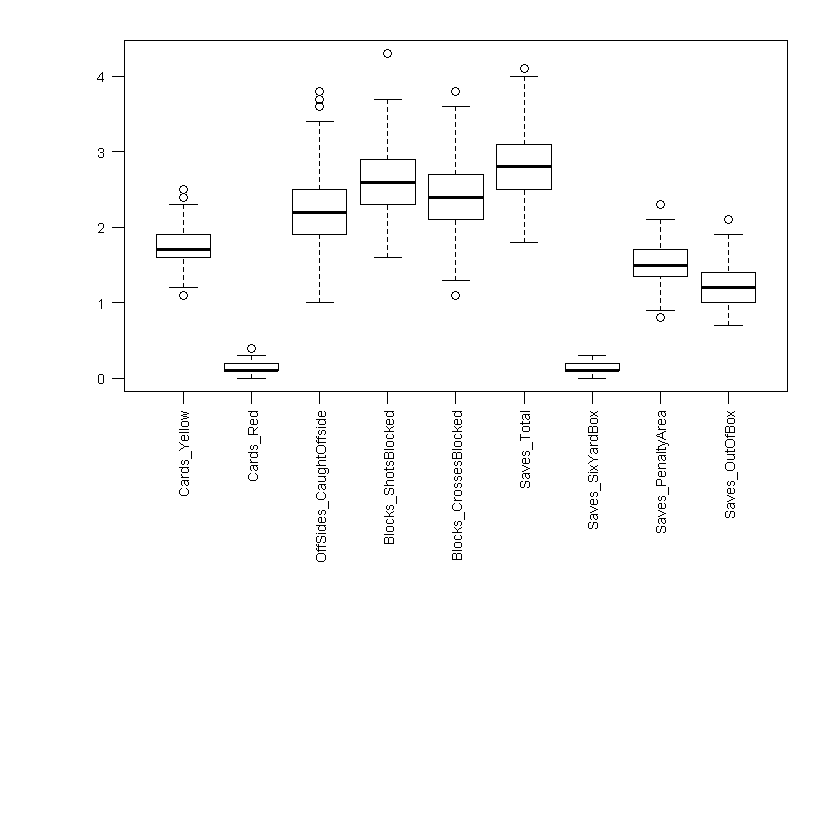

In [12]:
par(mfrow=c(2,1),oma = c(0,0, 0, 0), mgp = c(0, 0.8, 0), mar = 1.2 + c(0,4, .5,1), cex.main=1,cex.lab=0.4,cex.axis=0.7)
boxplot(def[,c(7:9,11,12,14:17)],las=2)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


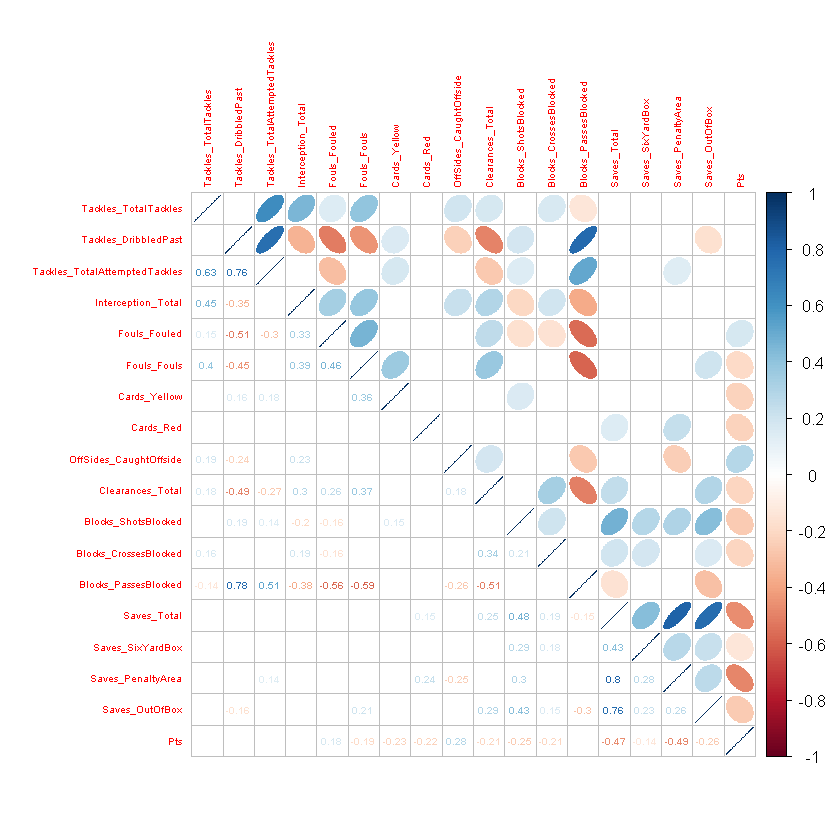

In [13]:
library(corrplot)
res2 <- cor.mtest(def, conf.level = .95)
corrplot.mixed(cor(def),upper="ellipse",diag='u',tl.pos='lt',tl.cex=0.5,number.cex= 0.5,p.mat=res2$p,insig="blank")

In [14]:
#on enlève les équipes de 2013 et avant à cause des valeurs manquantes
def2<-def[c(1:120),]

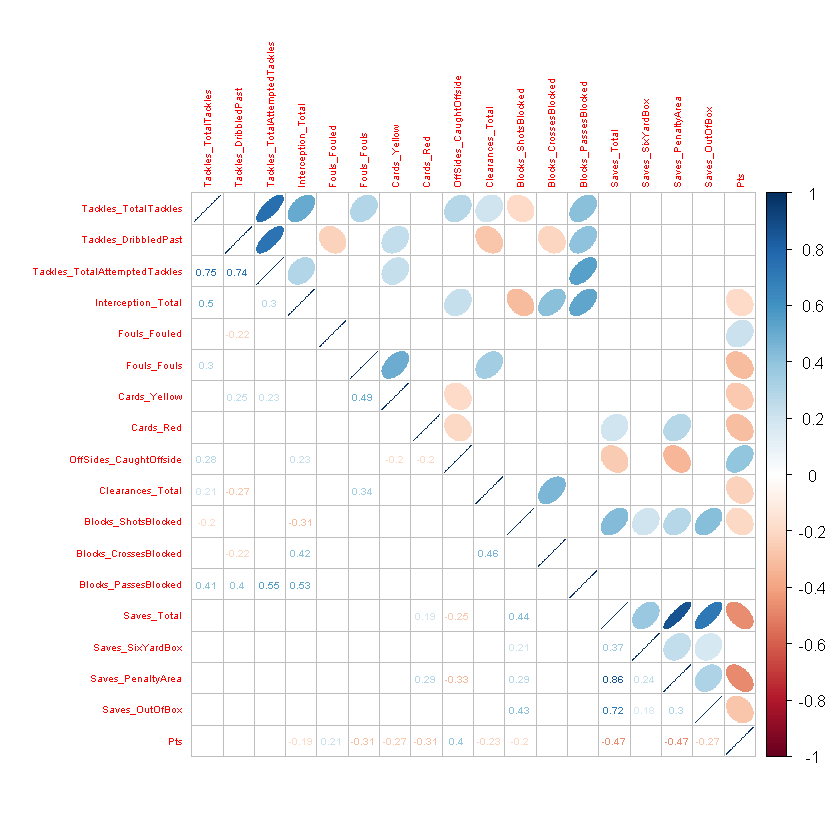

In [15]:
res2 <- cor.mtest(def2, conf.level = .95)
corrplot.mixed(cor(def2),upper="ellipse",diag='u',tl.pos='lt',tl.cex=0.5,number.cex= 0.5,p.mat=res2$p,insig="blank")

## Exploration des variables Offensive

In [17]:
off<- read.csv('./Donnees/Offensive.csv', header = TRUE,row.names =1, sep=';')
head(off)

,ShotsZones_OutOfBox,ShotsZones_SixYardBox,ShotsZones_PenaltyArea,ShotsSituations_OpenPlay,ShotsSituations_Counter,ShotsSituations_SetPiece,ShotsSituations_PenaltyTaken,ShotsAccuracy_OffTarget,ShotsAccuracy_OnPost,ShotsAccuracy_OnTarget,...,Dribbles_Unsuccessful,Dribbles_Successful,Dribbles_Total,PossesionLoss_UnsuccessfulTouches,PossesionLoss_Dispossessed,Aerial_Total,Aerial_Won,Aerial_Lost,Ratings,Points
PSG19,4.3,1.3,9.1,10.4,0.8,3.2,0.3,5.9,0.4,6.1,...,7.8,11.9,19.7,13.2,12.0,20.2,11.0,9.2,7.05,91
Lyon19,6.9,1.2,9.6,12.7,0.6,4.2,0.3,6.7,0.2,6.6,...,7.9,12.2,20.1,15.8,11.9,30.7,16.6,14.0,6.91,72
Lille19,5.6,0.5,6.9,9.0,0.8,2.9,0.3,5.2,0.2,5.1,...,7.0,9.6,16.6,14.5,12.1,31.1,15.4,15.7,6.84,72
Montpellier19,5.9,0.9,6.6,9.4,0.5,3.4,0.1,5.8,0.2,4.5,...,6.8,8.0,14.8,15.8,10.2,40.7,20.3,20.4,6.81,59
Saint-Etienne19,5.2,1.1,6.8,9.3,0.2,3.5,0.1,4.8,0.2,4.7,...,6.7,8.3,15.0,13.6,10.7,34.4,16.6,17.7,6.78,66
Marseille19,5.2,1.0,7.7,9.0,0.3,4.5,0.1,5.9,0.2,4.5,...,7.9,9.4,17.3,15.1,9.6,35.9,18.9,17.0,6.78,61


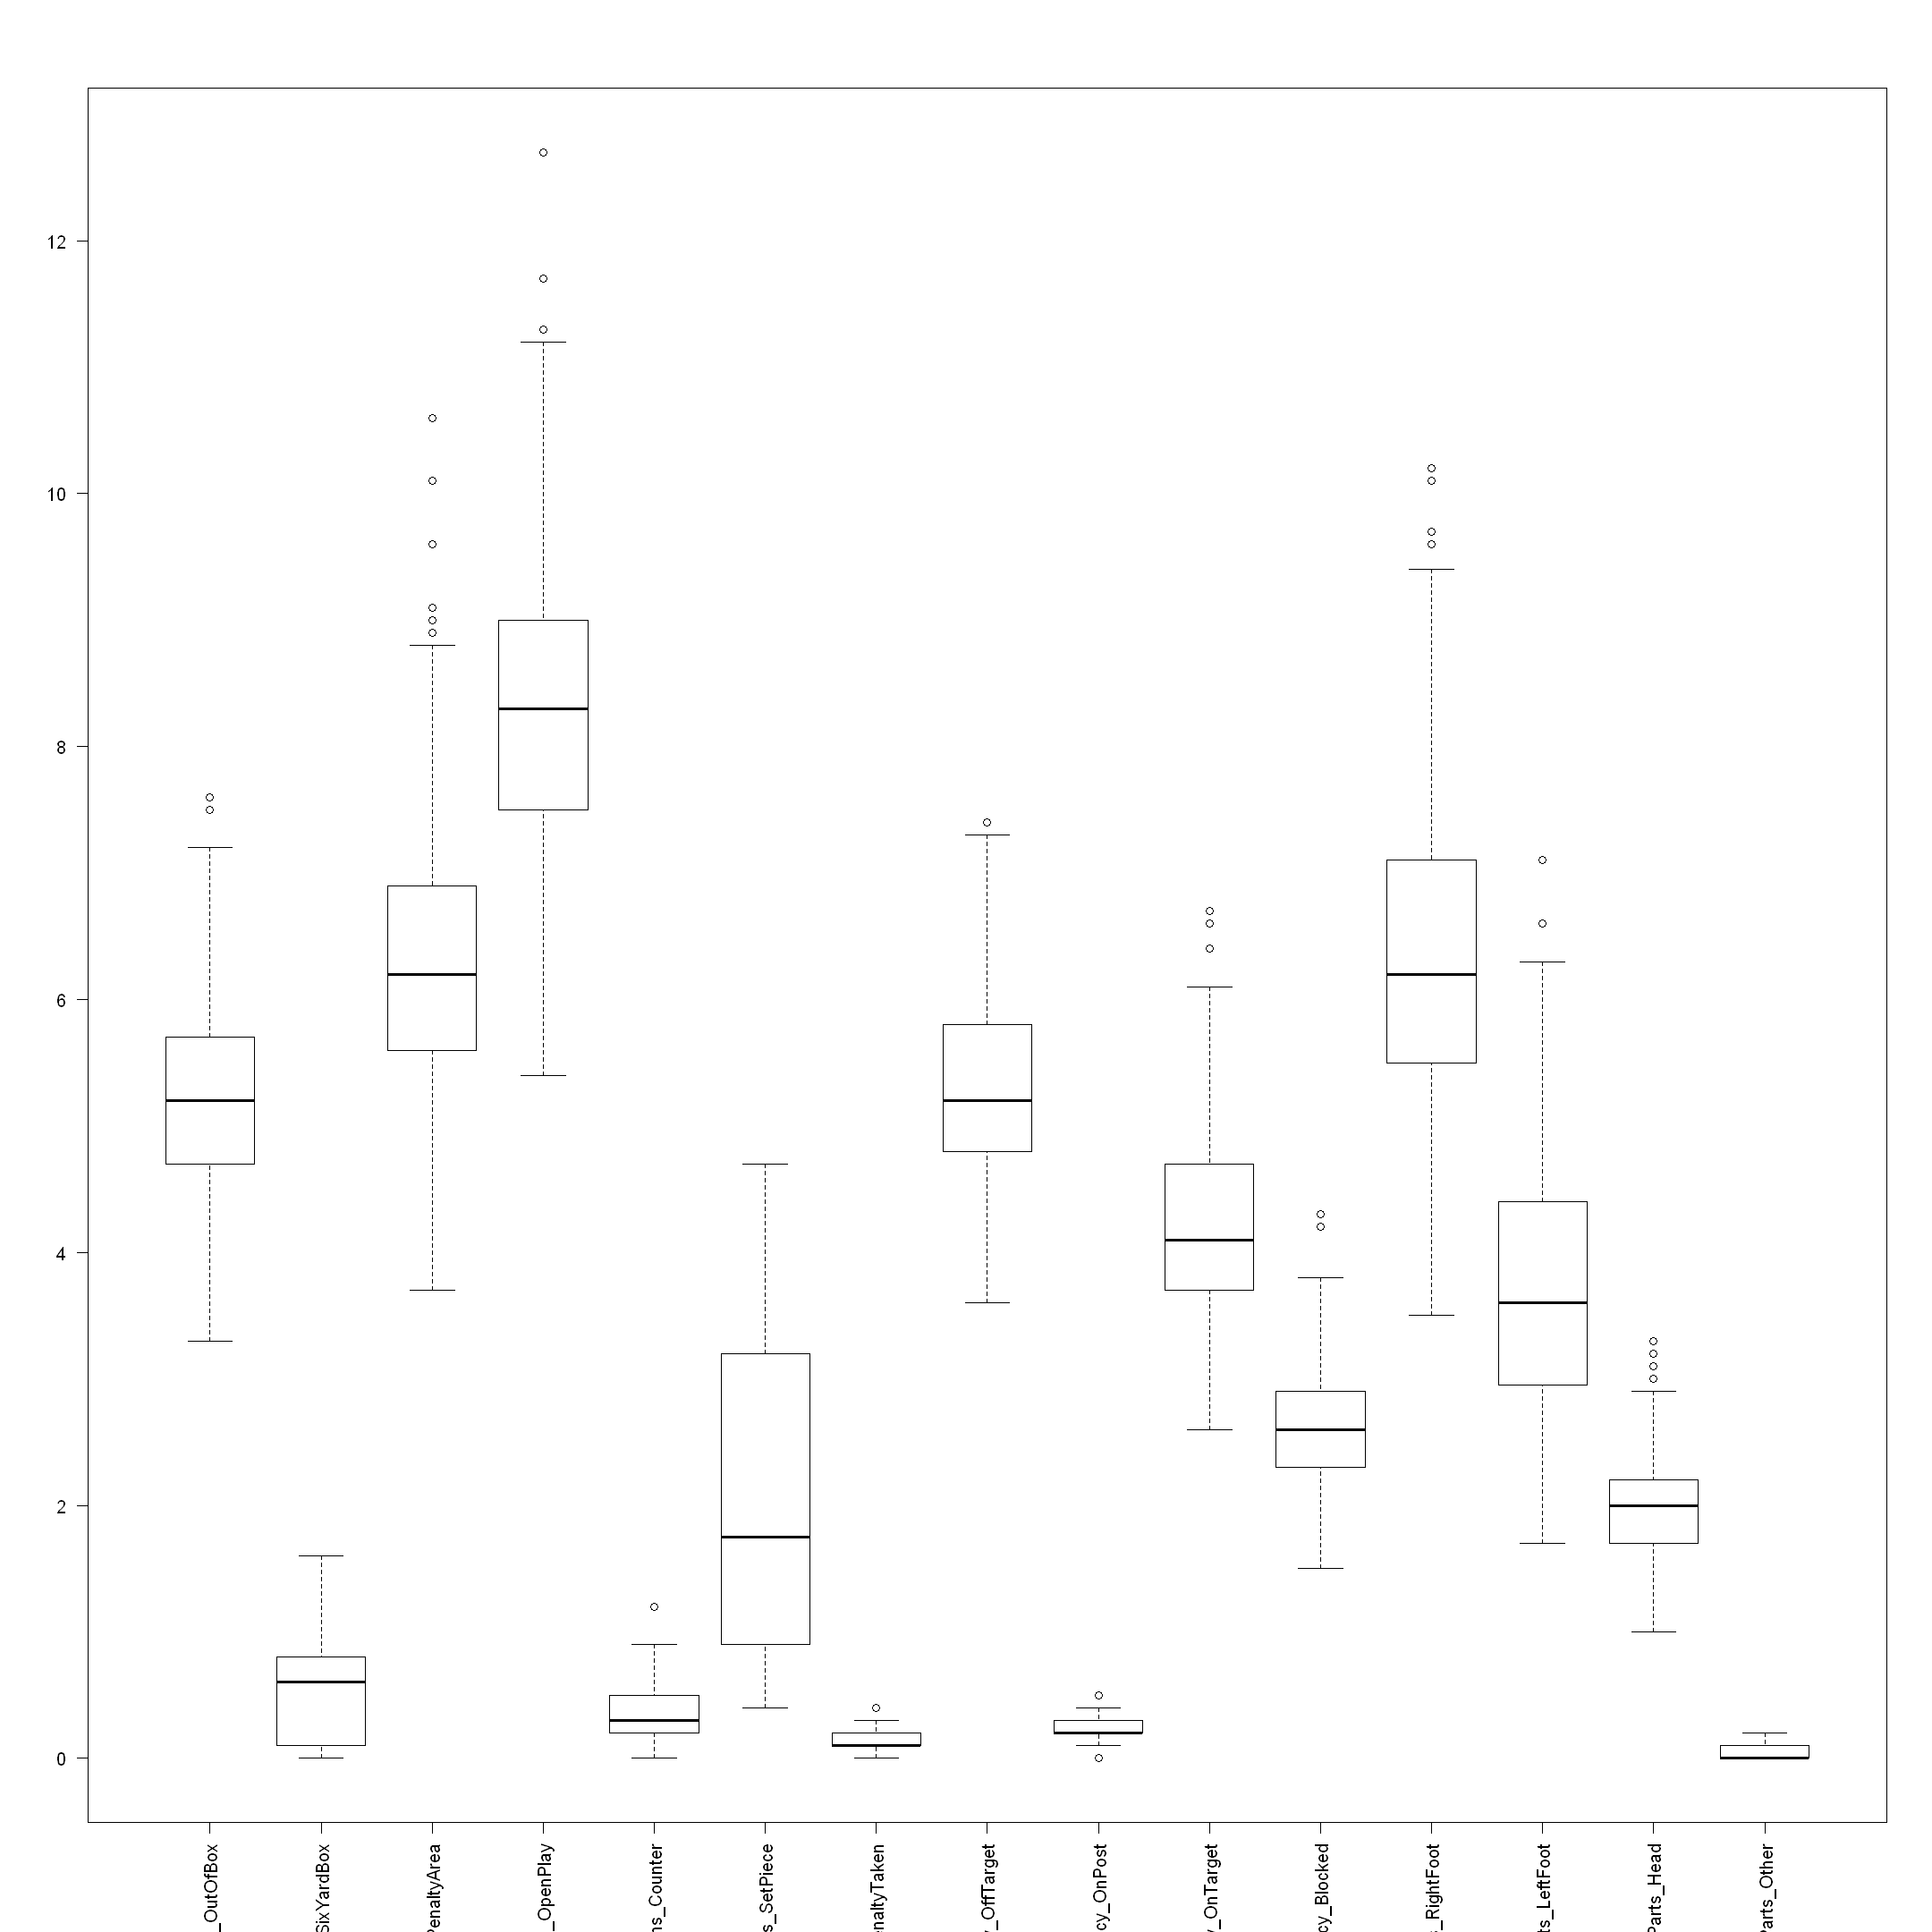

In [38]:
boxplot(off[c(1:15)],las=2)

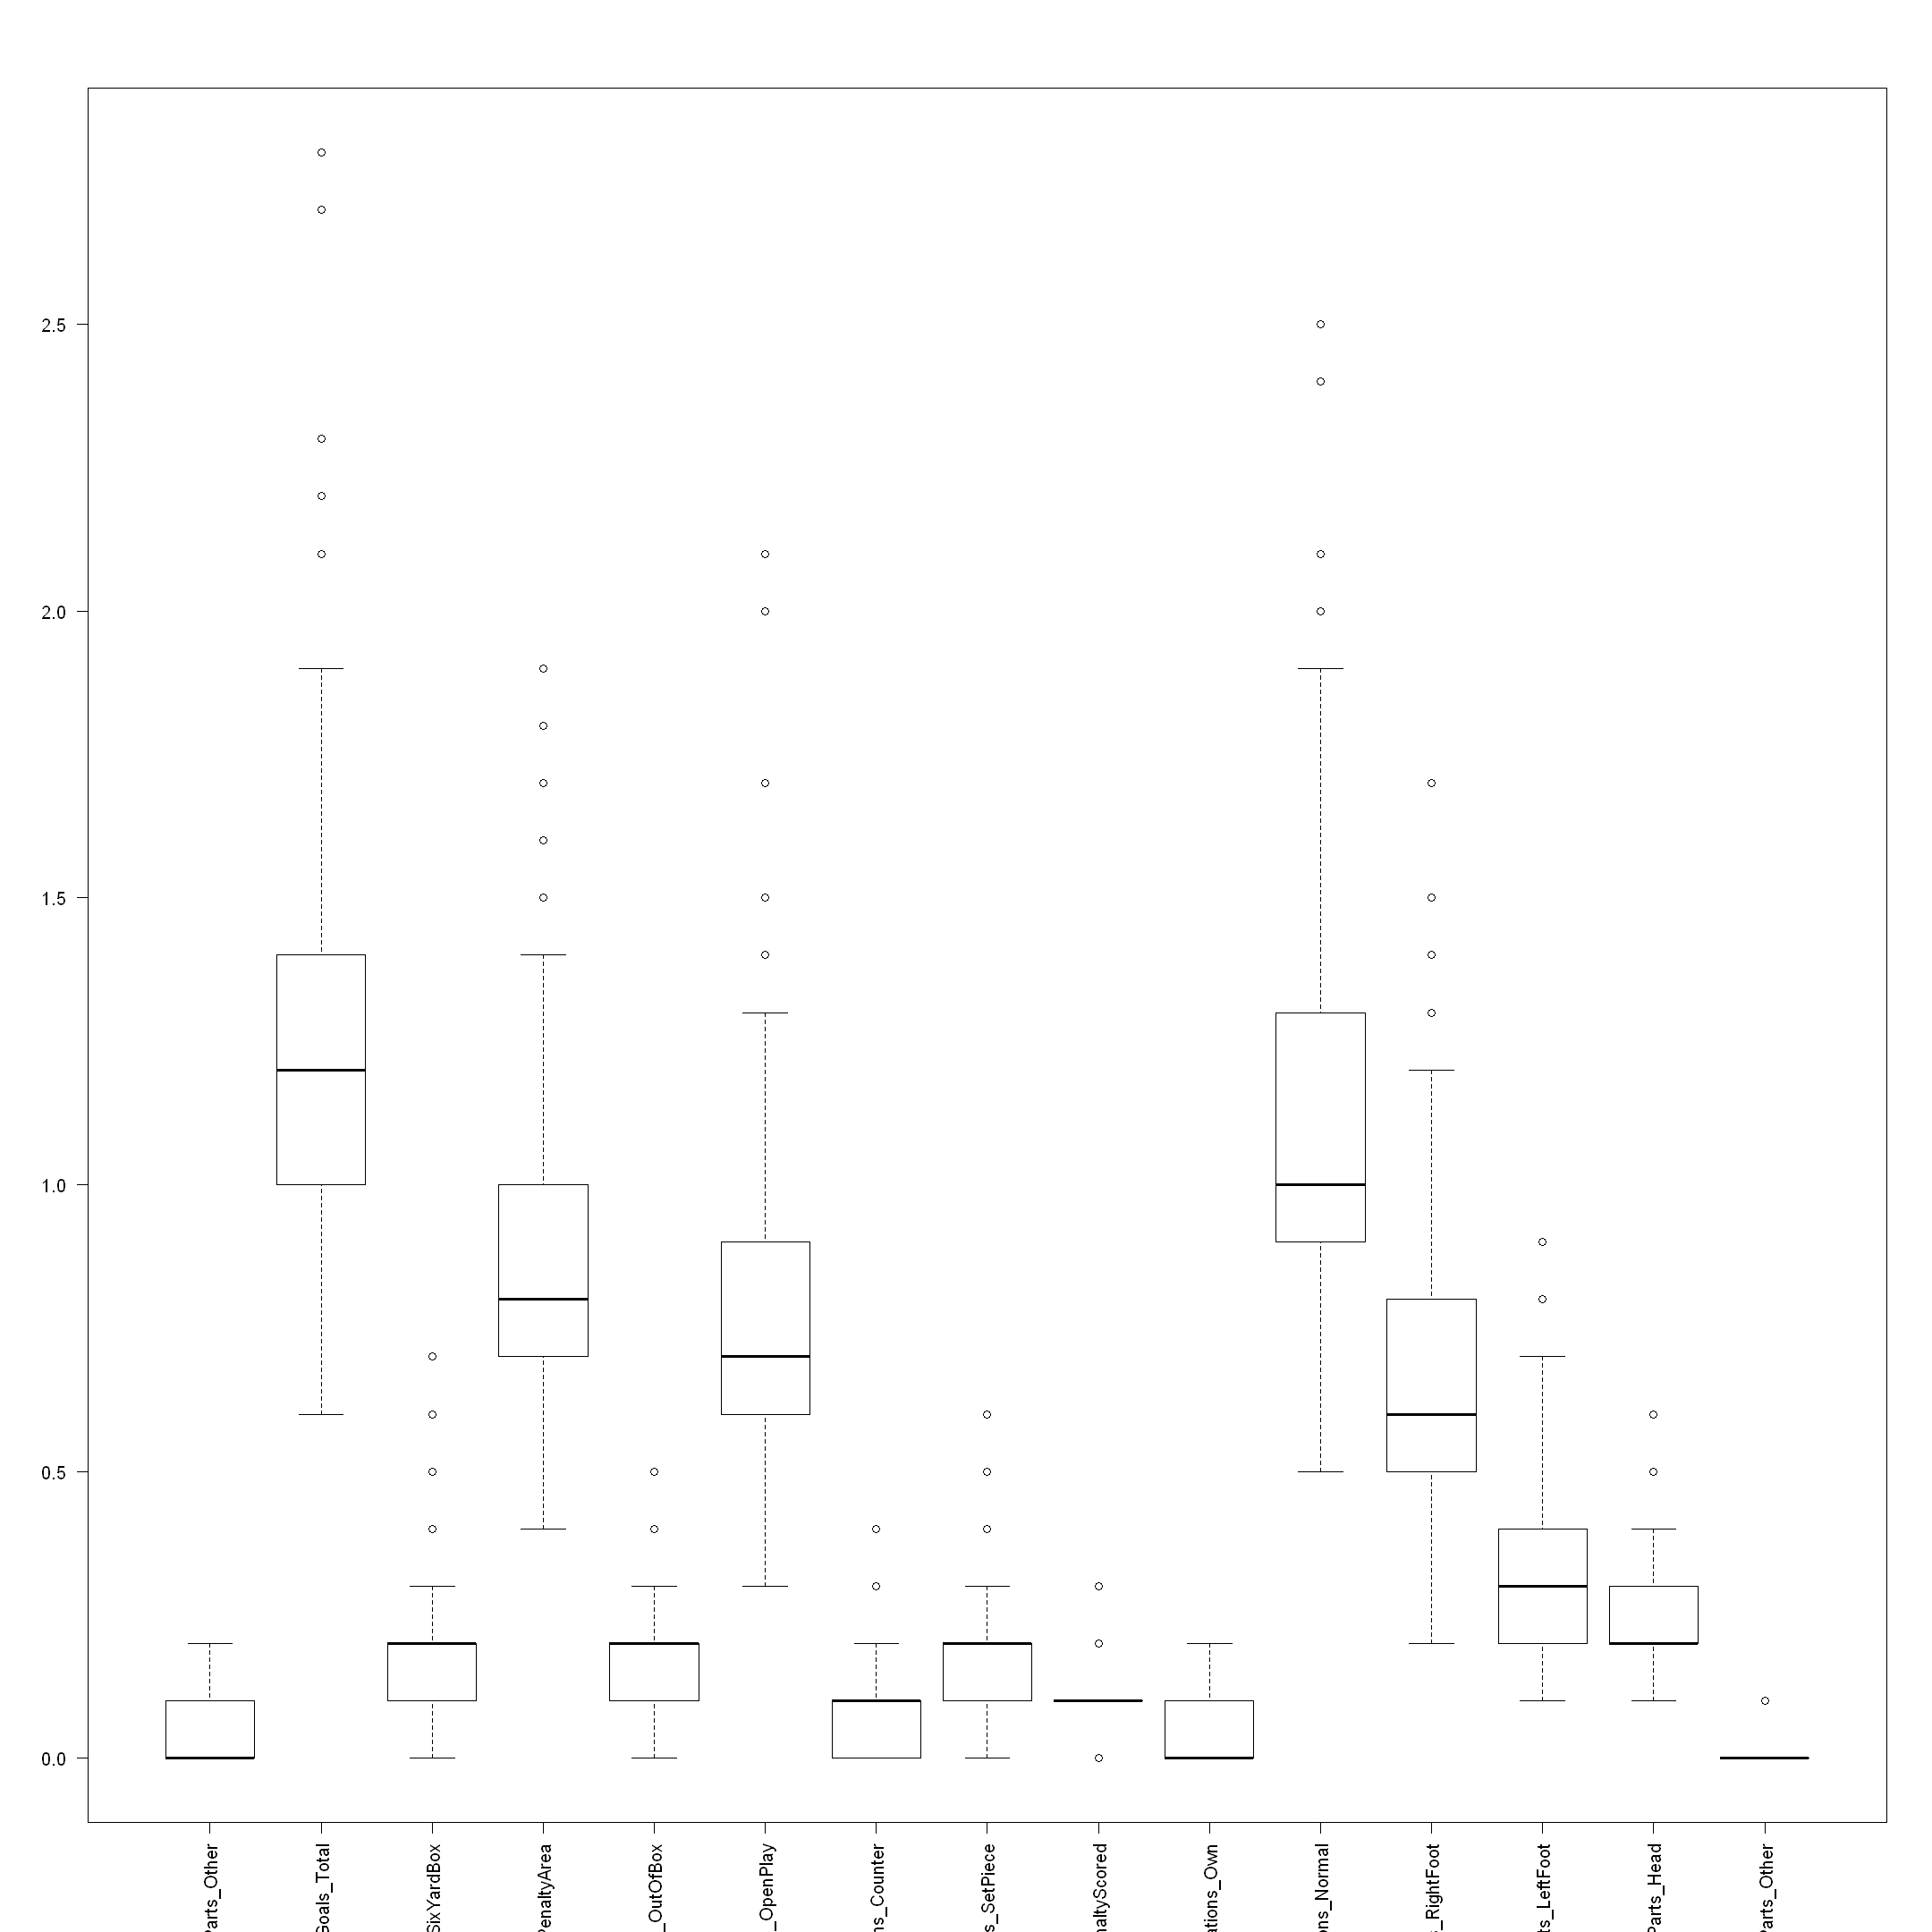

In [24]:
boxplot(off[c(15:29)],las=2)

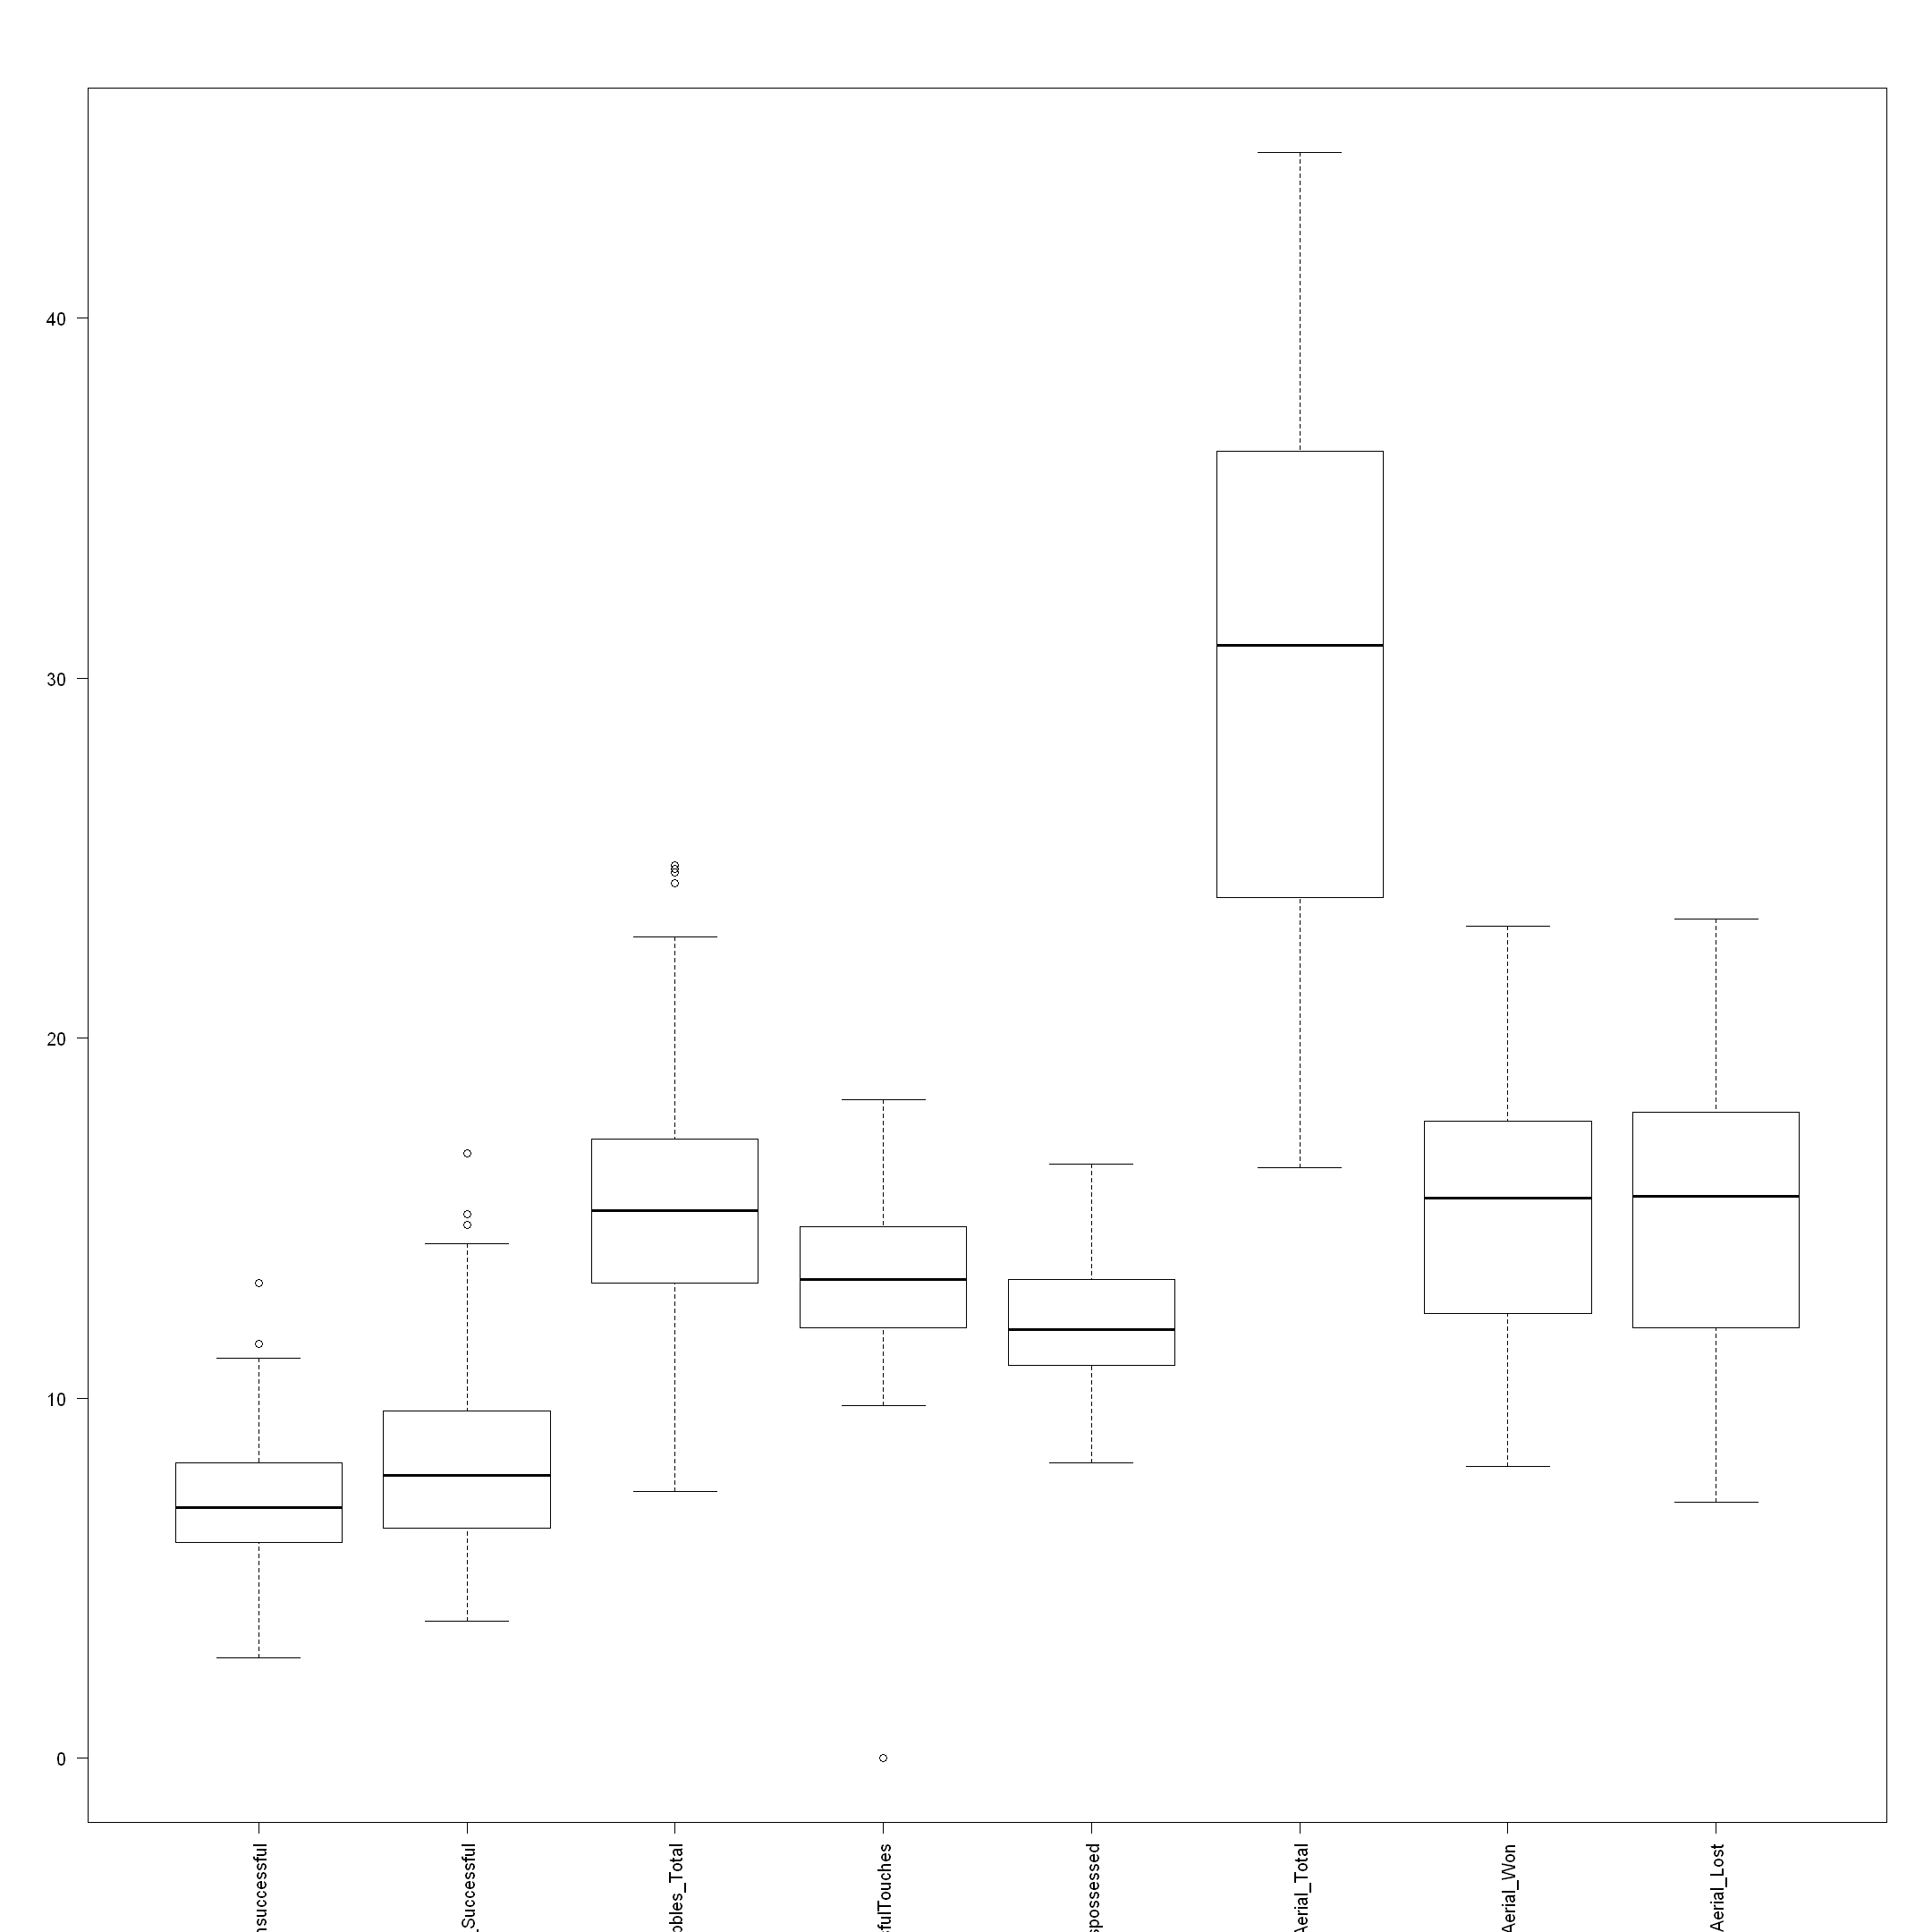

In [26]:
boxplot(off[c(30:37)],las=2)

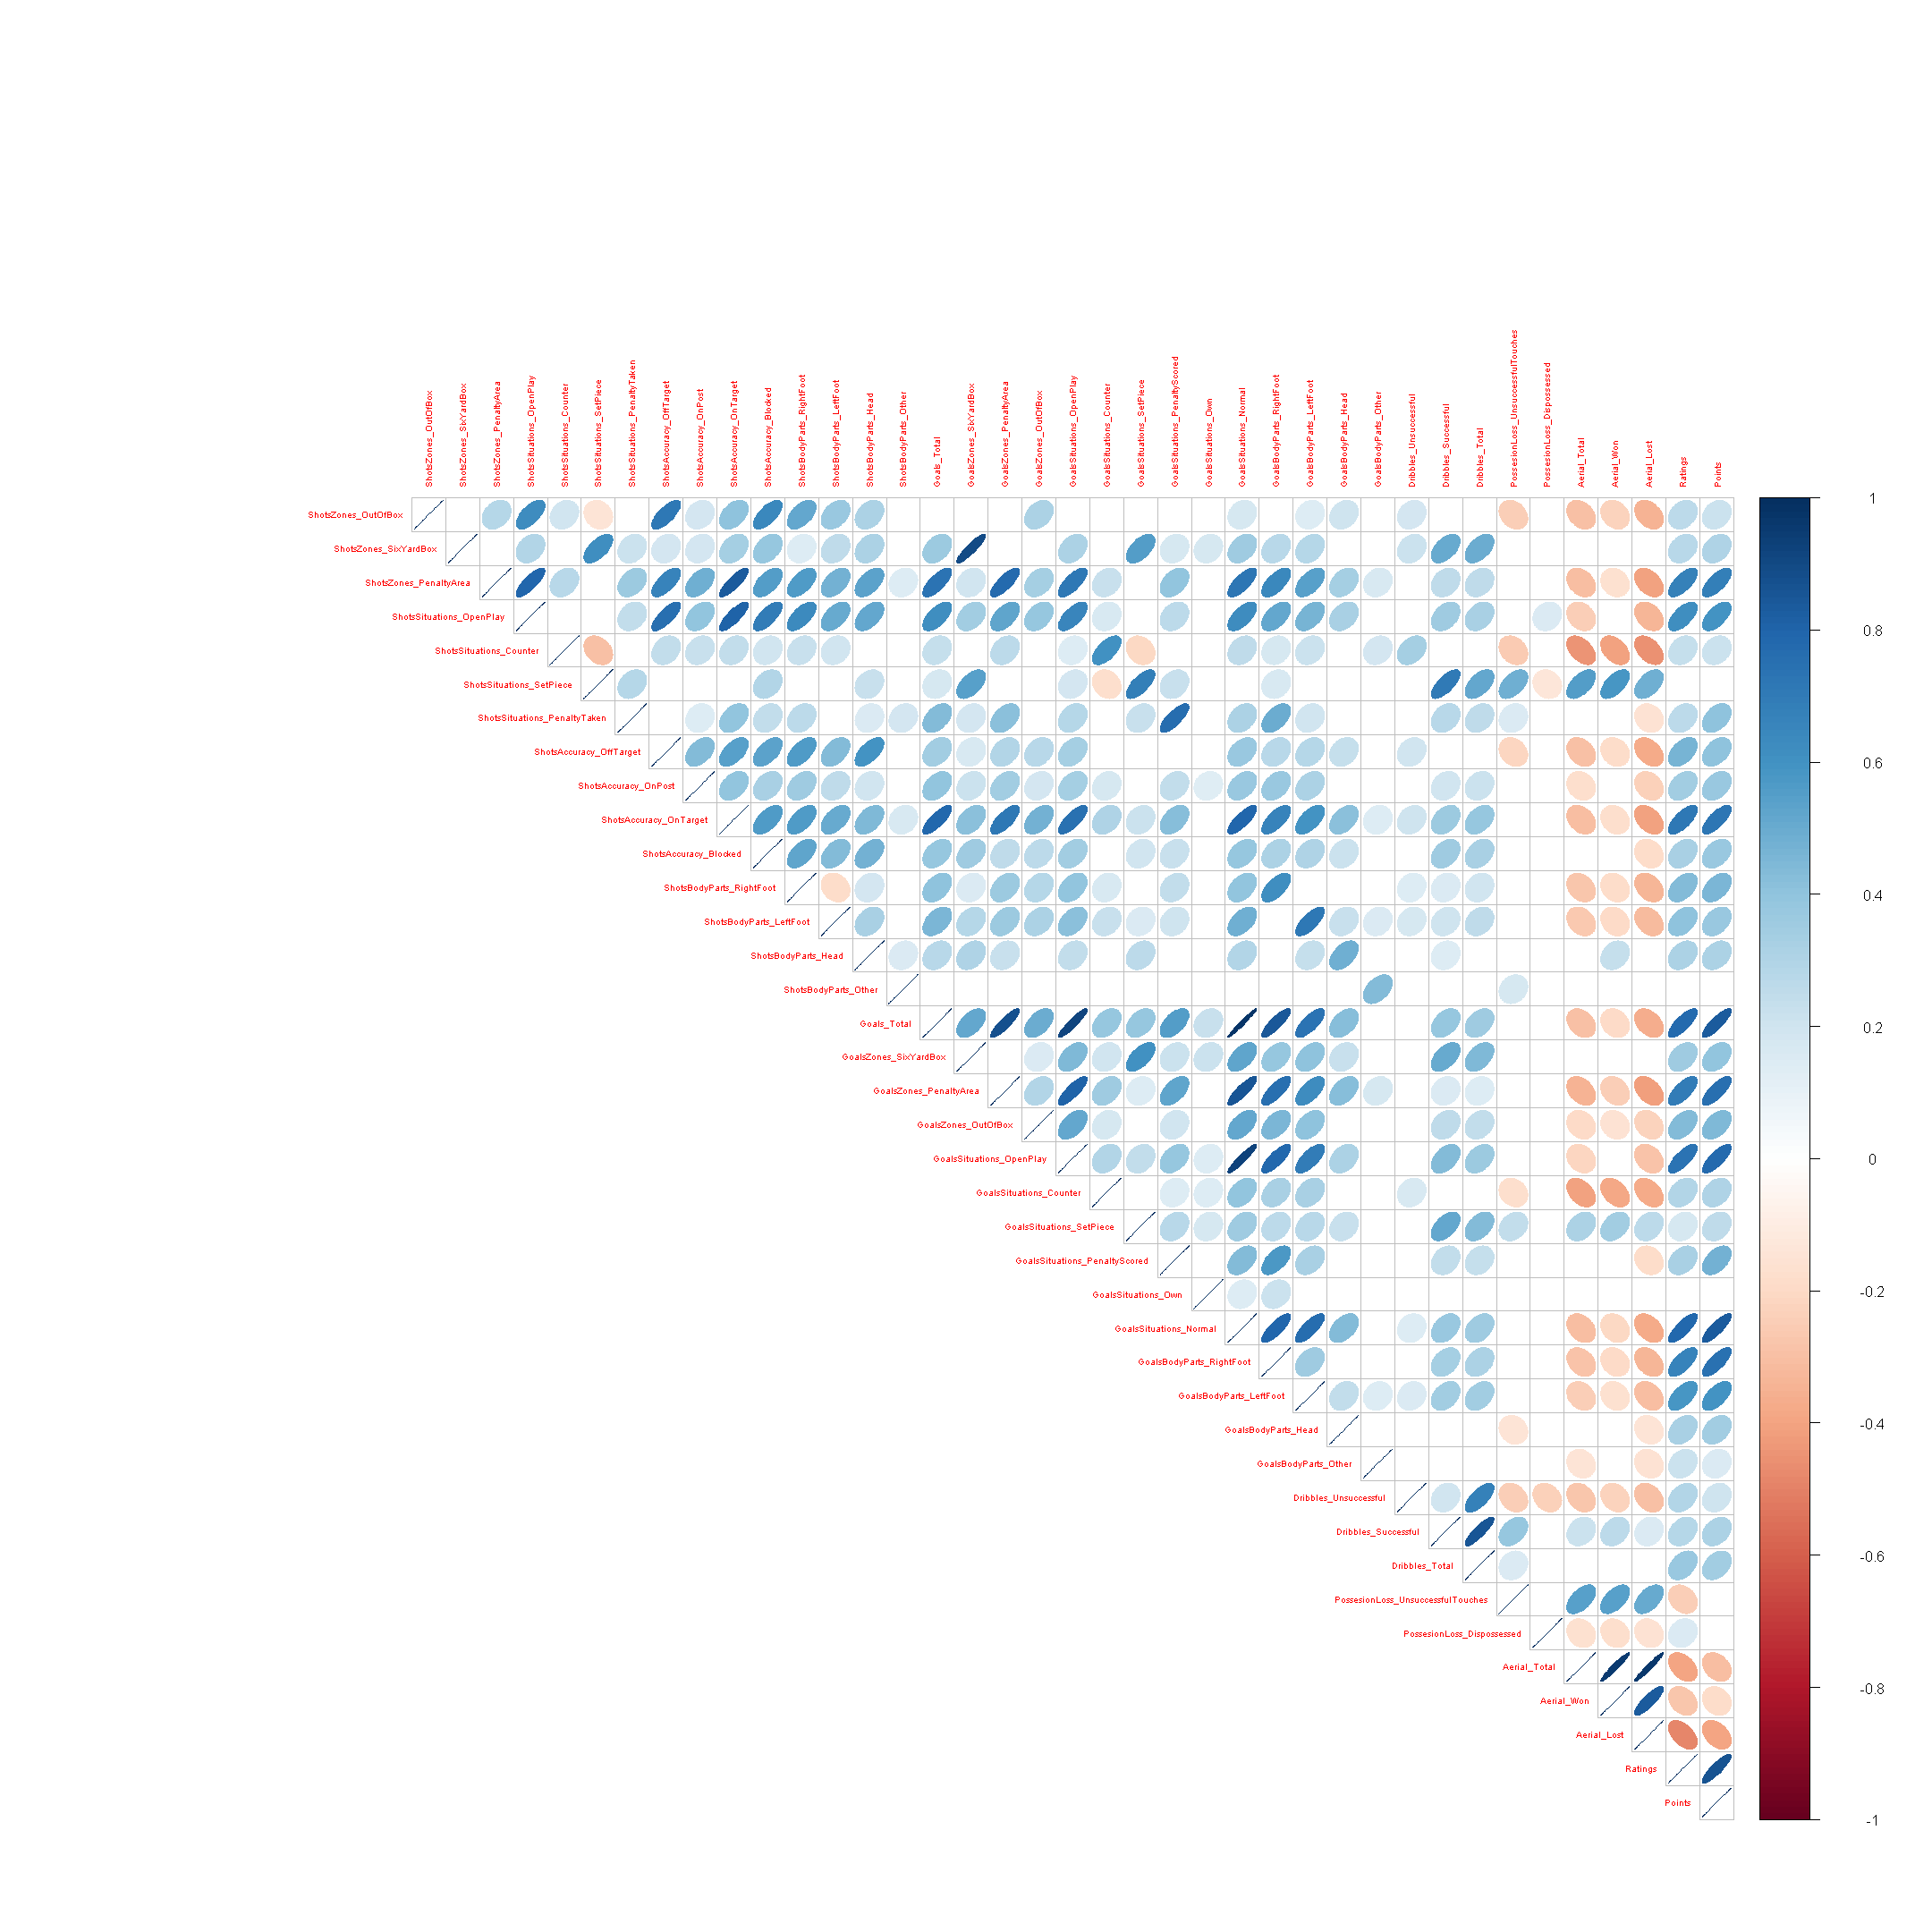

In [18]:
res1 <- cor.mtest(off, conf.level = .95)
corrplot(cor(off),method="ellipse",type="upper",tl.cex=0.5,p.mat=res1$p,insig="blank")

## Exploration des variables Passing

In [16]:
pas <- read.csv("./Donnees/Passing.csv", header = TRUE, row.names=1)
head(pas)

,Assists_Cross,Assists_Corner,Assists_Throughball,Assists_Freekick,Assists_Throwin,Assists_Other,Assists_Total,PassesLength_Total,PassesLength_AccLB,PassesLength_InAccLB,...,KeyPassesLength_Long,KeyPassesLength_Short,KeyPassesType_Cross,KeyPassesType_Corner,KeyPassesType_Throughball,KeyPassesType_Freekick,KeyPassesType_Throwin,KeyPassesType_Other,Pts,Rating
PSG19,0.3,0.1,0.3,0.0,0,1.3,1.9,621.3,23.1,13.1,...,1.7,9.4,2.1,1.0,1.1,0.1,0.1,7.9,91,7.05
Lyon19,0.3,0.0,0.2,0.0,0,0.9,1.4,548.6,26.1,19.6,...,2.2,10.8,3.0,1.1,0.6,0.4,0.0,9.2,72,6.91
Lille19,0.2,0.1,0.2,0.1,0,0.8,1.3,438.1,23.9,29.8,...,1.7,8.4,2.5,1.0,0.7,0.5,0.0,6.7,72,6.84
Montpellier19,0.2,0.1,0.1,0.0,0,0.4,0.7,416.7,36.2,31.6,...,1.7,8.0,2.9,0.8,0.3,0.5,0.2,6.1,59,6.81
Saint-Etienne19,0.5,0.1,0.1,0.1,0,0.5,1.1,453.9,31.8,32.8,...,1.8,7.9,2.5,1.1,0.3,0.4,0.1,6.6,66,6.78
Marseille19,0.3,0.1,0.1,0.0,0,0.8,1.2,473.7,26.6,27.2,...,1.8,8.9,3.6,1.4,0.4,0.6,0.0,6.3,61,6.78


In [17]:
str(pas)
#la colonne Assists_Throwin ne contient que des 0, nous l'enlevons, les variables assists et keypasses aussi 
x<-pas[-c(1:7,19:27,29)]
str(x)

'data.frame':	200 obs. of  29 variables:
 $ Assists_Cross            : num  0.3 0.3 0.2 0.2 0.5 0.3 0.1 0.4 0.2 0.4 ...
 $ Assists_Corner           : num  0.1 0 0.1 0.1 0.1 0.1 0 0.2 0.1 0.1 ...
 $ Assists_Throughball      : num  0.3 0.2 0.2 0.1 0.1 0.1 0 0.1 0 0.2 ...
 $ Assists_Freekick         : num  0 0 0.1 0 0.1 0 0.1 0.1 0 0 ...
 $ Assists_Throwin          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Assists_Other            : num  1.3 0.9 0.8 0.4 0.5 0.8 0.3 0.4 0.7 0.5 ...
 $ Assists_Total            : num  1.9 1.4 1.3 0.7 1.1 1.2 0.5 1 0.9 1.1 ...
 $ PassesLength_Total       : num  621 549 438 417 454 ...
 $ PassesLength_AccLB       : num  23.1 26.1 23.9 36.2 31.8 26.6 27.6 27.5 27 37.3 ...
 $ PassesLength_InAccLB     : num  13.1 19.6 29.8 31.6 32.8 27.2 24.1 35.8 27.2 29.3 ...
 $ PassesLength_AccSP       : num  529 445 331 291 336 ...
 $ PassesLength_InAccSP     : num  55.9 57.6 53.2 57.8 53.2 56.3 49.1 56.1 52.7 57.6 ...
 $ PassesType_AccCr         : num  3.4 5.2 3.9 5.1 4.4 5.7 3.3 4.

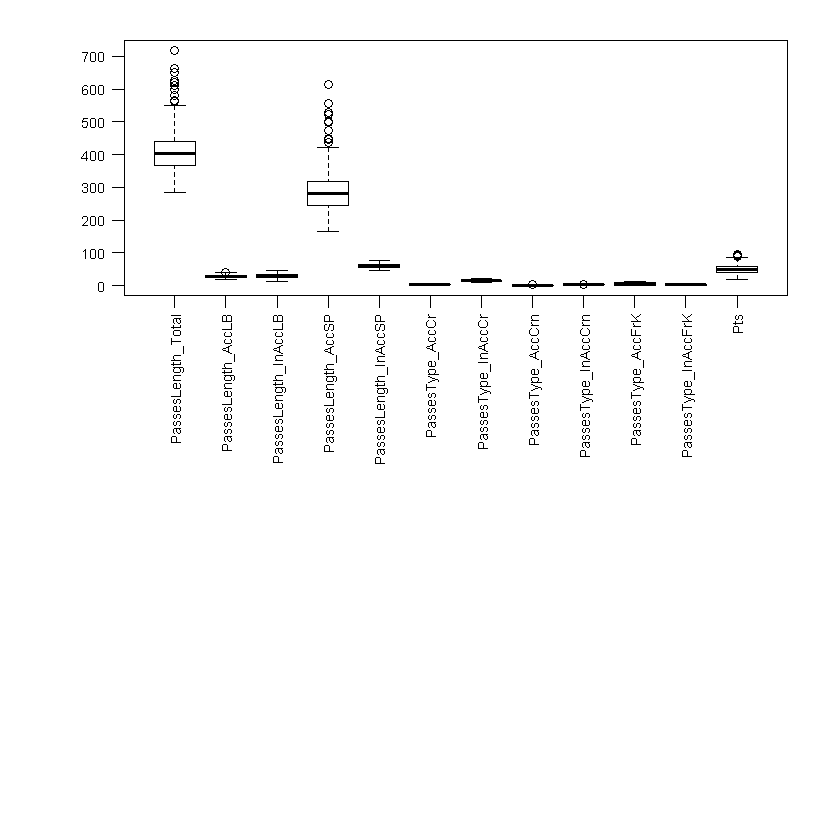

In [18]:
par(mfrow=c(2,1),oma = c(0,0, 0, 0), mgp = c(0, 0.8, 0), mar = 1.2 + c(4,4, .5,1), cex.main=1,cex.lab=0.4,cex.axis=0.7)
#par(mfrow=c(2,1),oma = c(0,0, 0, 0), mgp = c(0, 0.8, 0), mar = 1.2 + c(4,4, .5,1), cex.main=1,cex.lab=0.4,cex.axis=0.7)
boxplot(x,las=2)

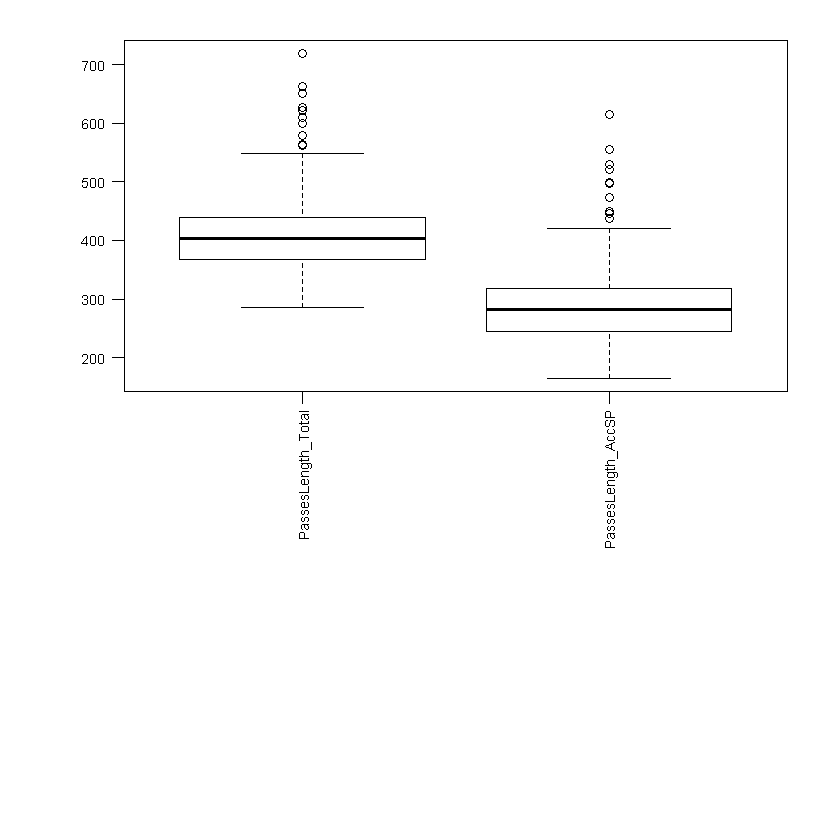

In [19]:
par(mfrow=c(2,1),oma = c(0,0, 0, 0), mgp = c(0, 0.8, 0), mar = 1.2 + c(0,4, .5,1), cex.main=1,cex.lab=0.4,cex.axis=0.7)
boxplot(x[,c(1,4)],las=2)

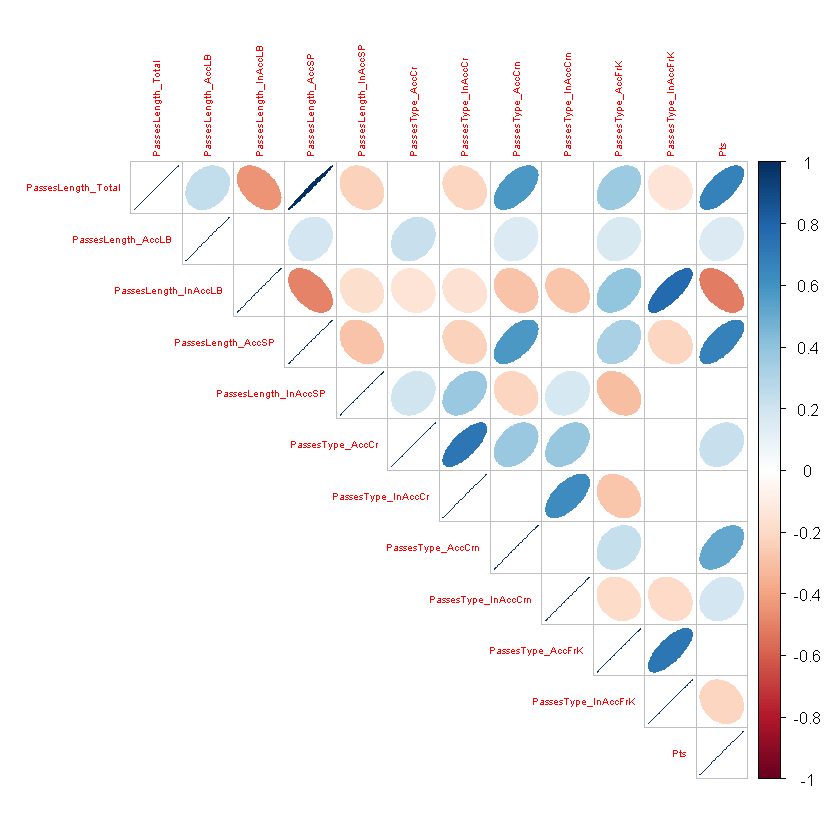

In [20]:
library(corrplot)
res1 <- cor.mtest(x, conf.level = .95)
corrplot(cor(x),method="ellipse",type="upper",tl.cex=0.5,p.mat=res1$p,insig="blank")

## Analyse sur le tableau entier 

In [ ]:
tot <- read.csv("./Donnees/Total.csv", header = TRUE, row.names=1)
head(tot)

In [25]:
#X<-tot[-c(78:91)]
#head(X)
#x1<-tot[-c(29:37,53:66)] #on enlève les variables liées à Key_Passes et Goals 
#head(x1)

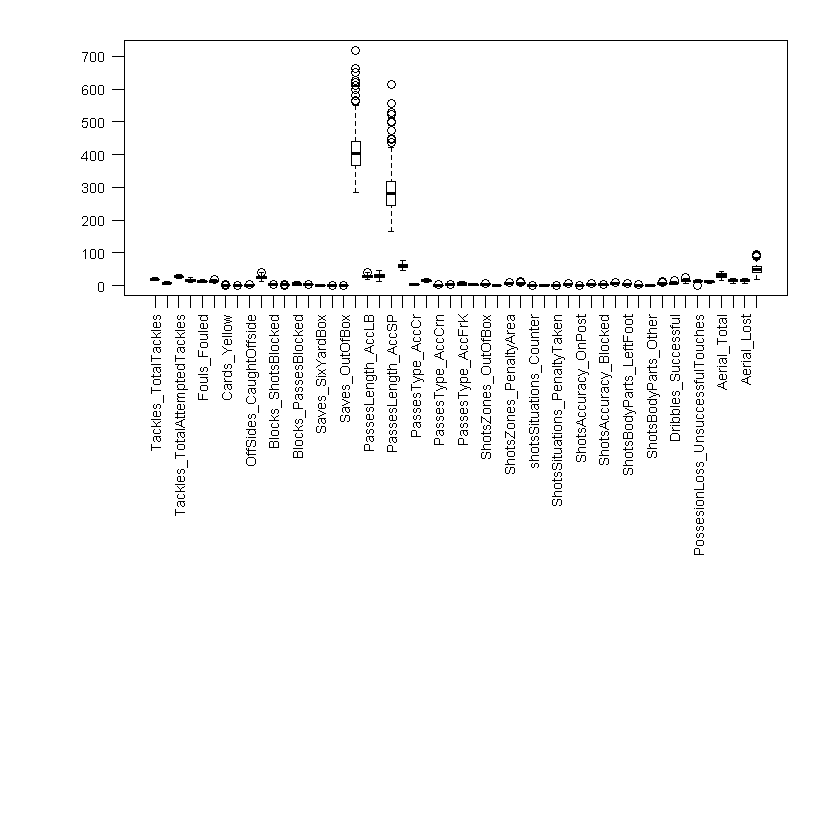

In [26]:
par(mfrow=c(2,1),oma = c(0,0, 0, 0), mgp = c(0, 0.8, 0), mar = 1.2 + c(4,4, .5,1), cex.main=1,cex.lab=0.4,cex.axis=0.7)
boxplot(tot,las=2)

## ACP Classique

In [27]:
library(FactoMineR)
res.acp<-PCA(tot,scale.unit=T, graph=F, ncp=2,quanti.sup=52)

Warning message:
"package 'FactoMineR' was built under R version 3.6.3"

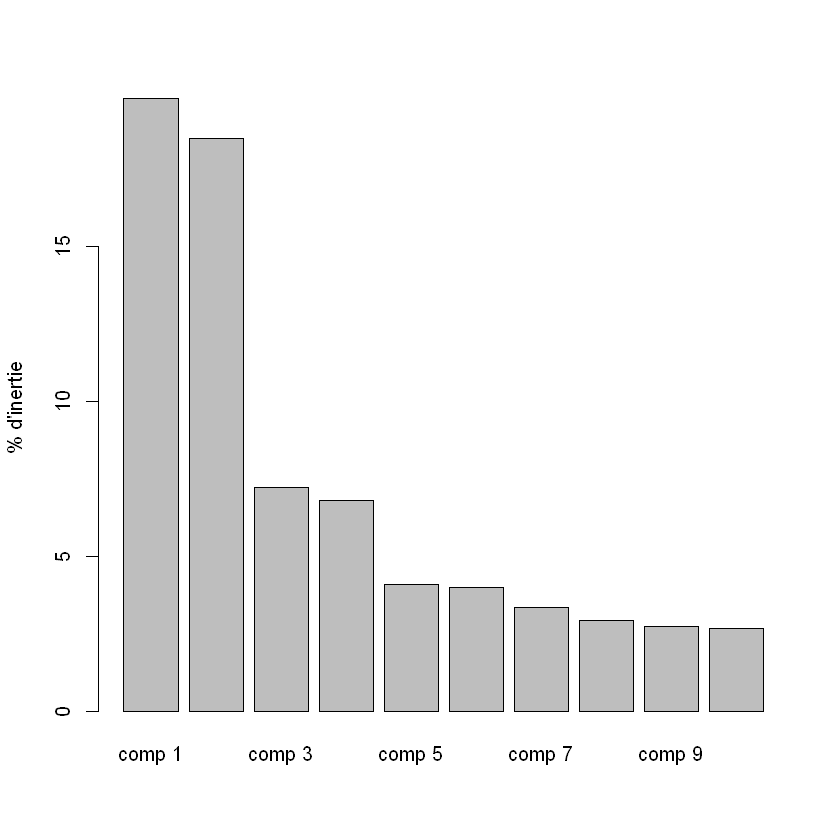

In [28]:
barplot(res.acp$eig[1:10,2],ylab="% d'inertie")

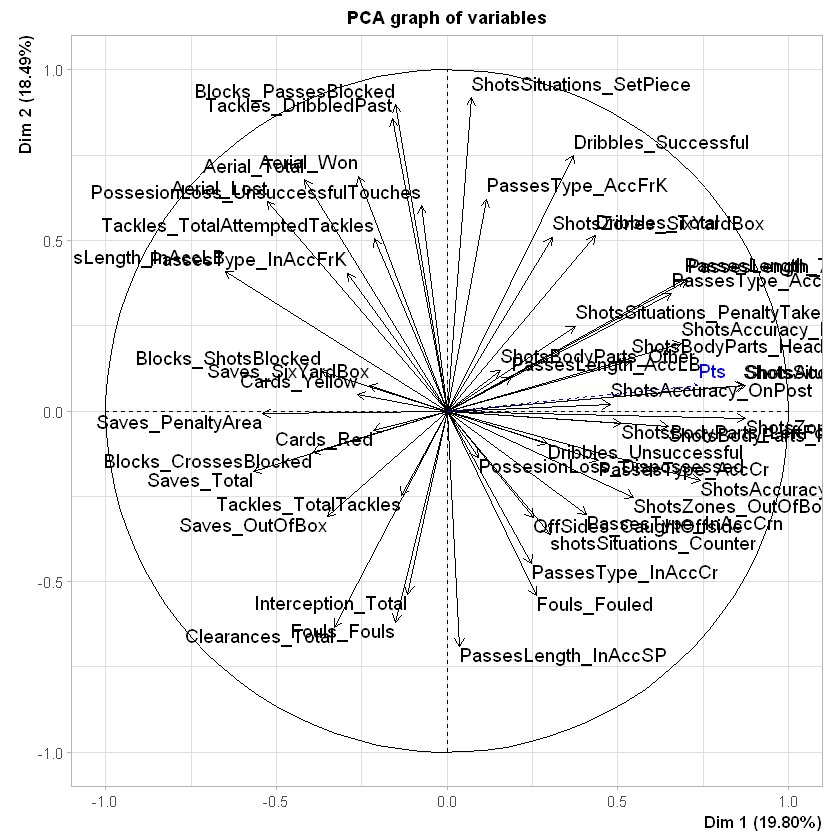

In [29]:
plot(res.acp, choix = "var")

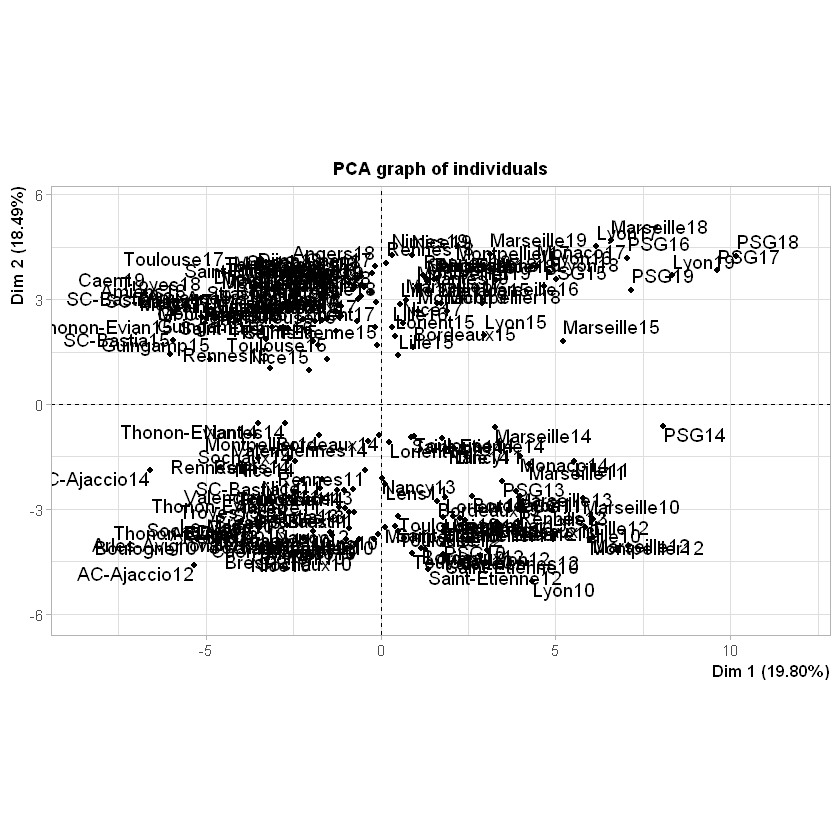

In [30]:
plot(res.acp, axes=c(1,2), choix="ind",  repel = TRUE )

## Fonction cos² de l'ACP avec FactomineR

In [31]:
res.acp$var$cos2

,Dim.1,Dim.2
Tackles_TotalTackles,0.018090897,6.146804e-02
Tackles_DribbledPast,0.025479460,7.327845e-01
Tackles_TotalAttemptedTackles,0.044883873,2.541041e-01
Interception_Total,0.013287117,2.875154e-01
Fouls_Fouled,0.068059720,2.930387e-01
Fouls_Fouls,0.022854741,3.845122e-01
Cards_Yellow,0.068487137,2.248755e-03
Cards_Red,0.046835480,3.173263e-03
OffSides_CaughtOffside,0.064488226,9.792929e-02
Clearances_Total,0.108062533,4.037751e-01


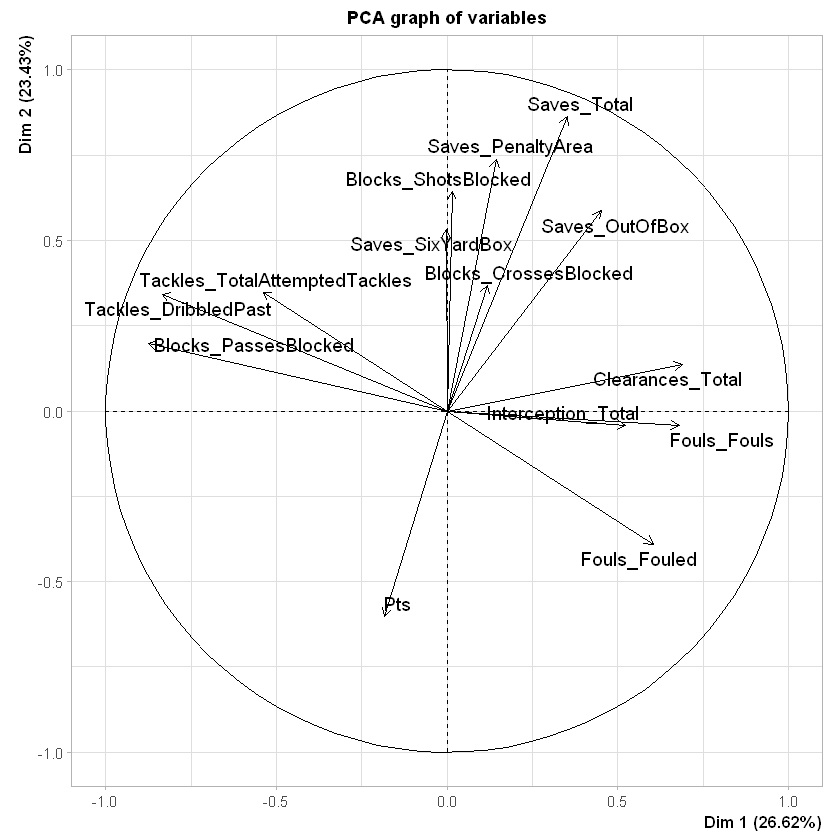

In [32]:
x2<-subset(tot, select = c("Tackles_DribbledPast", "Tackles_TotalAttemptedTackles", "Interception_Total",
                         "Fouls_Fouled", "Clearances_Total", "Fouls_Fouls", "Blocks_PassesBlocked","Saves_Total",
                         "Saves_OutOfBox", "Blocks_ShotsBlocked", "Blocks_CrossesBlocked", "Saves_SixYardBox", 
                         "Saves_PenaltyArea", "Pts" ))
res.acp2<-PCA(x2,scale.unit=T, graph=F)
plot(res.acp2, choix = "var")

## Fonction contrib de l'ACP avec FactomineR

In [33]:
res.acp$var$contrib

,Dim.1,Dim.2
Tackles_TotalTackles,0.17918154,0.6519018521
Tackles_DribbledPast,0.25236167,7.7715767513
Tackles_TotalAttemptedTackles,0.44455296,2.6949113920
Interception_Total,0.13160244,3.0492569218
Fouls_Fouled,0.67409846,3.1078340427
Fouls_Fouls,0.22636511,4.0779600981
Cards_Yellow,0.67833182,0.0238492607
Cards_Red,0.46388267,0.0336541790
OffSides_CaughtOffside,0.63872454,1.0385932295
Clearances_Total,1.07030688,4.2822539347


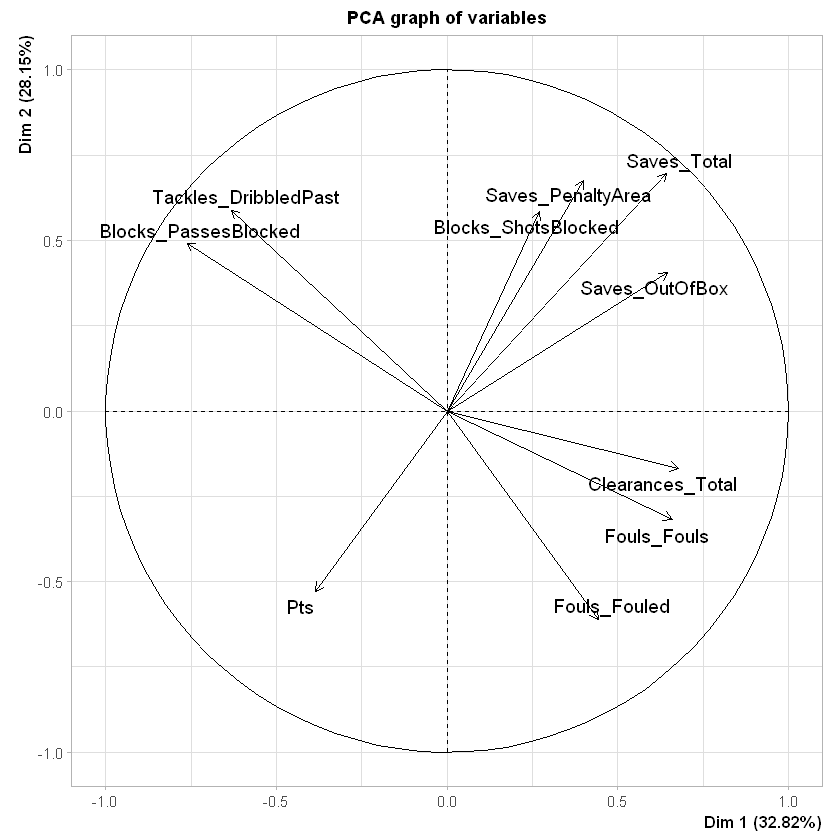

In [34]:
x3<-subset(tot, select = c("Tackles_DribbledPast", "Fouls_Fouled", "Clearances_Total", "Fouls_Fouls", "Blocks_PassesBlocked",
                         "Saves_Total","Saves_OutOfBox", "Blocks_ShotsBlocked", "Saves_PenaltyArea", "Pts" ))
res.acp3<-PCA(x3,scale.unit=T, graph=F)
plot(res.acp3, choix = "var")

## SPARSE PCA 

In [28]:
install.packages("mixOmics")
library(mixOmics)
v<-spca(x,ncomp=2,keepX=c(5,5))
W<-spca(x1,ncomp=2,keepX=c(10,10))
J<-spca(x1,ncomp=2,keepX=c(20,20))
plotVar(v)
plotVar(W)
plotVar(J)

Installing package into 'C:/Users/Ariel/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'mixOmics' is not available (for R version 3.6.1)"

ERROR: Error in library(mixOmics): there is no package called 'mixOmics'


In [39]:
selectVar(v,1)
selectVar(v,2)

ERROR: Error in selectVar(v, 1): impossible de trouver la fonction "selectVar"


## Régression Linéaire 

In [29]:
To<-lm(Pts~., data=tot)
summary(To)


Call:
lm(formula = Pts ~ ., data = tot)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.5795  -5.4507   0.2861   5.5118  23.4186 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)                       -12.81490   30.75357  -0.417  0.67750   
Tackles_TotalTackles                9.99540   13.82500   0.723  0.47082   
Tackles_DribbledPast               10.80804   14.01046   0.771  0.44168   
Tackles_TotalAttemptedTackles      -9.90334   13.84499  -0.715  0.47555   
Interception_Total                  0.28941    0.30204   0.958  0.33954   
Fouls_Fouled                        1.13804    0.64417   1.767  0.07935 . 
Fouls_Fouls                         0.69063    0.66588   1.037  0.30135   
Cards_Yellow                       -4.27570    3.20532  -1.334  0.18427   
Cards_Red                          -5.61195   11.66818  -0.481  0.63125   
OffSides_CaughtOffside             -0.42632    1.68114  -0.254  0.80016   
Clearances_Tota

In [30]:
too <- step(To, direction = "backward")
summary(too)

Start:  AIC=913.36
Pts ~ Tackles_TotalTackles + Tackles_DribbledPast + Tackles_TotalAttemptedTackles + 
    Interception_Total + Fouls_Fouled + Fouls_Fouls + Cards_Yellow + 
    Cards_Red + OffSides_CaughtOffside + Clearances_Total + Blocks_ShotsBlocked + 
    Blocks_CrossesBlocked + Blocks_PassesBlocked + Saves_Total + 
    Saves_SixYardBox + Saves_PenaltyArea + Saves_OutOfBox + PassesLength_Total + 
    PassesLength_AccLB + PassesLength_InAccLB + PassesLength_AccSP + 
    PassesLength_InAccSP + PassesType_AccCr + PassesType_InAccCr + 
    PassesType_AccCrn + PassesType_InAccCrn + PassesType_AccFrK + 
    PassesType_InAccFrK + ShotsZones_OutOfBox + ShotsZones_SixYardBox + 
    ShotsZones_PenaltyArea + ShotsSituations_OpenPlay + shotsSituations_Counter + 
    ShotsSituations_SetPiece + ShotsSituations_PenaltyTaken + 
    ShotsAccuracy_OffTarget + ShotsAccuracy_OnPost + ShotsAccuracy_OnTarget + 
    ShotsAccuracy_Blocked + ShotsBodyParts_RightFoot + ShotsBodyParts_LeftFoot + 
    ShotsB


Call:
lm(formula = Pts ~ Fouls_Fouled + Clearances_Total + Blocks_PassesBlocked + 
    Saves_Total + Saves_OutOfBox + PassesLength_AccSP + PassesType_AccCr + 
    PassesType_AccFrK + ShotsZones_SixYardBox + ShotsSituations_OpenPlay + 
    ShotsSituations_PenaltyTaken + ShotsAccuracy_OffTarget + 
    ShotsAccuracy_Blocked + ShotsBodyParts_RightFoot + ShotsBodyParts_LeftFoot + 
    ShotsBodyParts_Head, data = tot)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.4080  -6.0378  -0.1752   5.6096  23.2500 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -20.35299   13.16236  -1.546  0.12376    
Fouls_Fouled                   0.88507    0.45612   1.940  0.05387 .  
Clearances_Total               0.42305    0.15358   2.755  0.00647 ** 
Blocks_PassesBlocked           0.50652    0.26093   1.941  0.05377 .  
Saves_Total                   -6.73387    2.44093  -2.759  0.00639 ** 
Saves_OutOfBox                 5.29251

## CLUSTERING

In [1]:
library(FactoMineR)
library(corrplot)
library(ggplot2)
library(factoextra)
library(stringr)
library(kml)
library(tidyr)
install.packages("RColorBrewer")
library(gplots)
library(RColorBrewer)

Warning message:
"package 'FactoMineR' was built under R version 3.6.2"Warning message:
"package 'corrplot' was built under R version 3.6.2"corrplot 0.84 loaded
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'factoextra' was built under R version 3.6.2"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'kml' was built under R version 3.6.3"Loading required package: clv
Warning message:
"package 'clv' was built under R version 3.6.3"Loading required package: cluster
Loading required package: class
Loading required package: longitudinalData
Warning message:
"package 'longitudinalData' was built under R version 3.6.3"Loading required package: rgl
Warning message:
"package 'rgl' was built under R version 3.6.3"Loading required package: misc3d
Warning message:
"package 'misc3d' was built under R version 3.6.3"Warning

In [59]:
Nouveau = read.csv('./Donnees/Totalreverse.csv',sep="\t", header = TRUE,row.names =2)
#imputation des données manquantes
NouvImp <- imputation(as.matrix(Nouveau[, 2:751]), method ="copyMean.global")

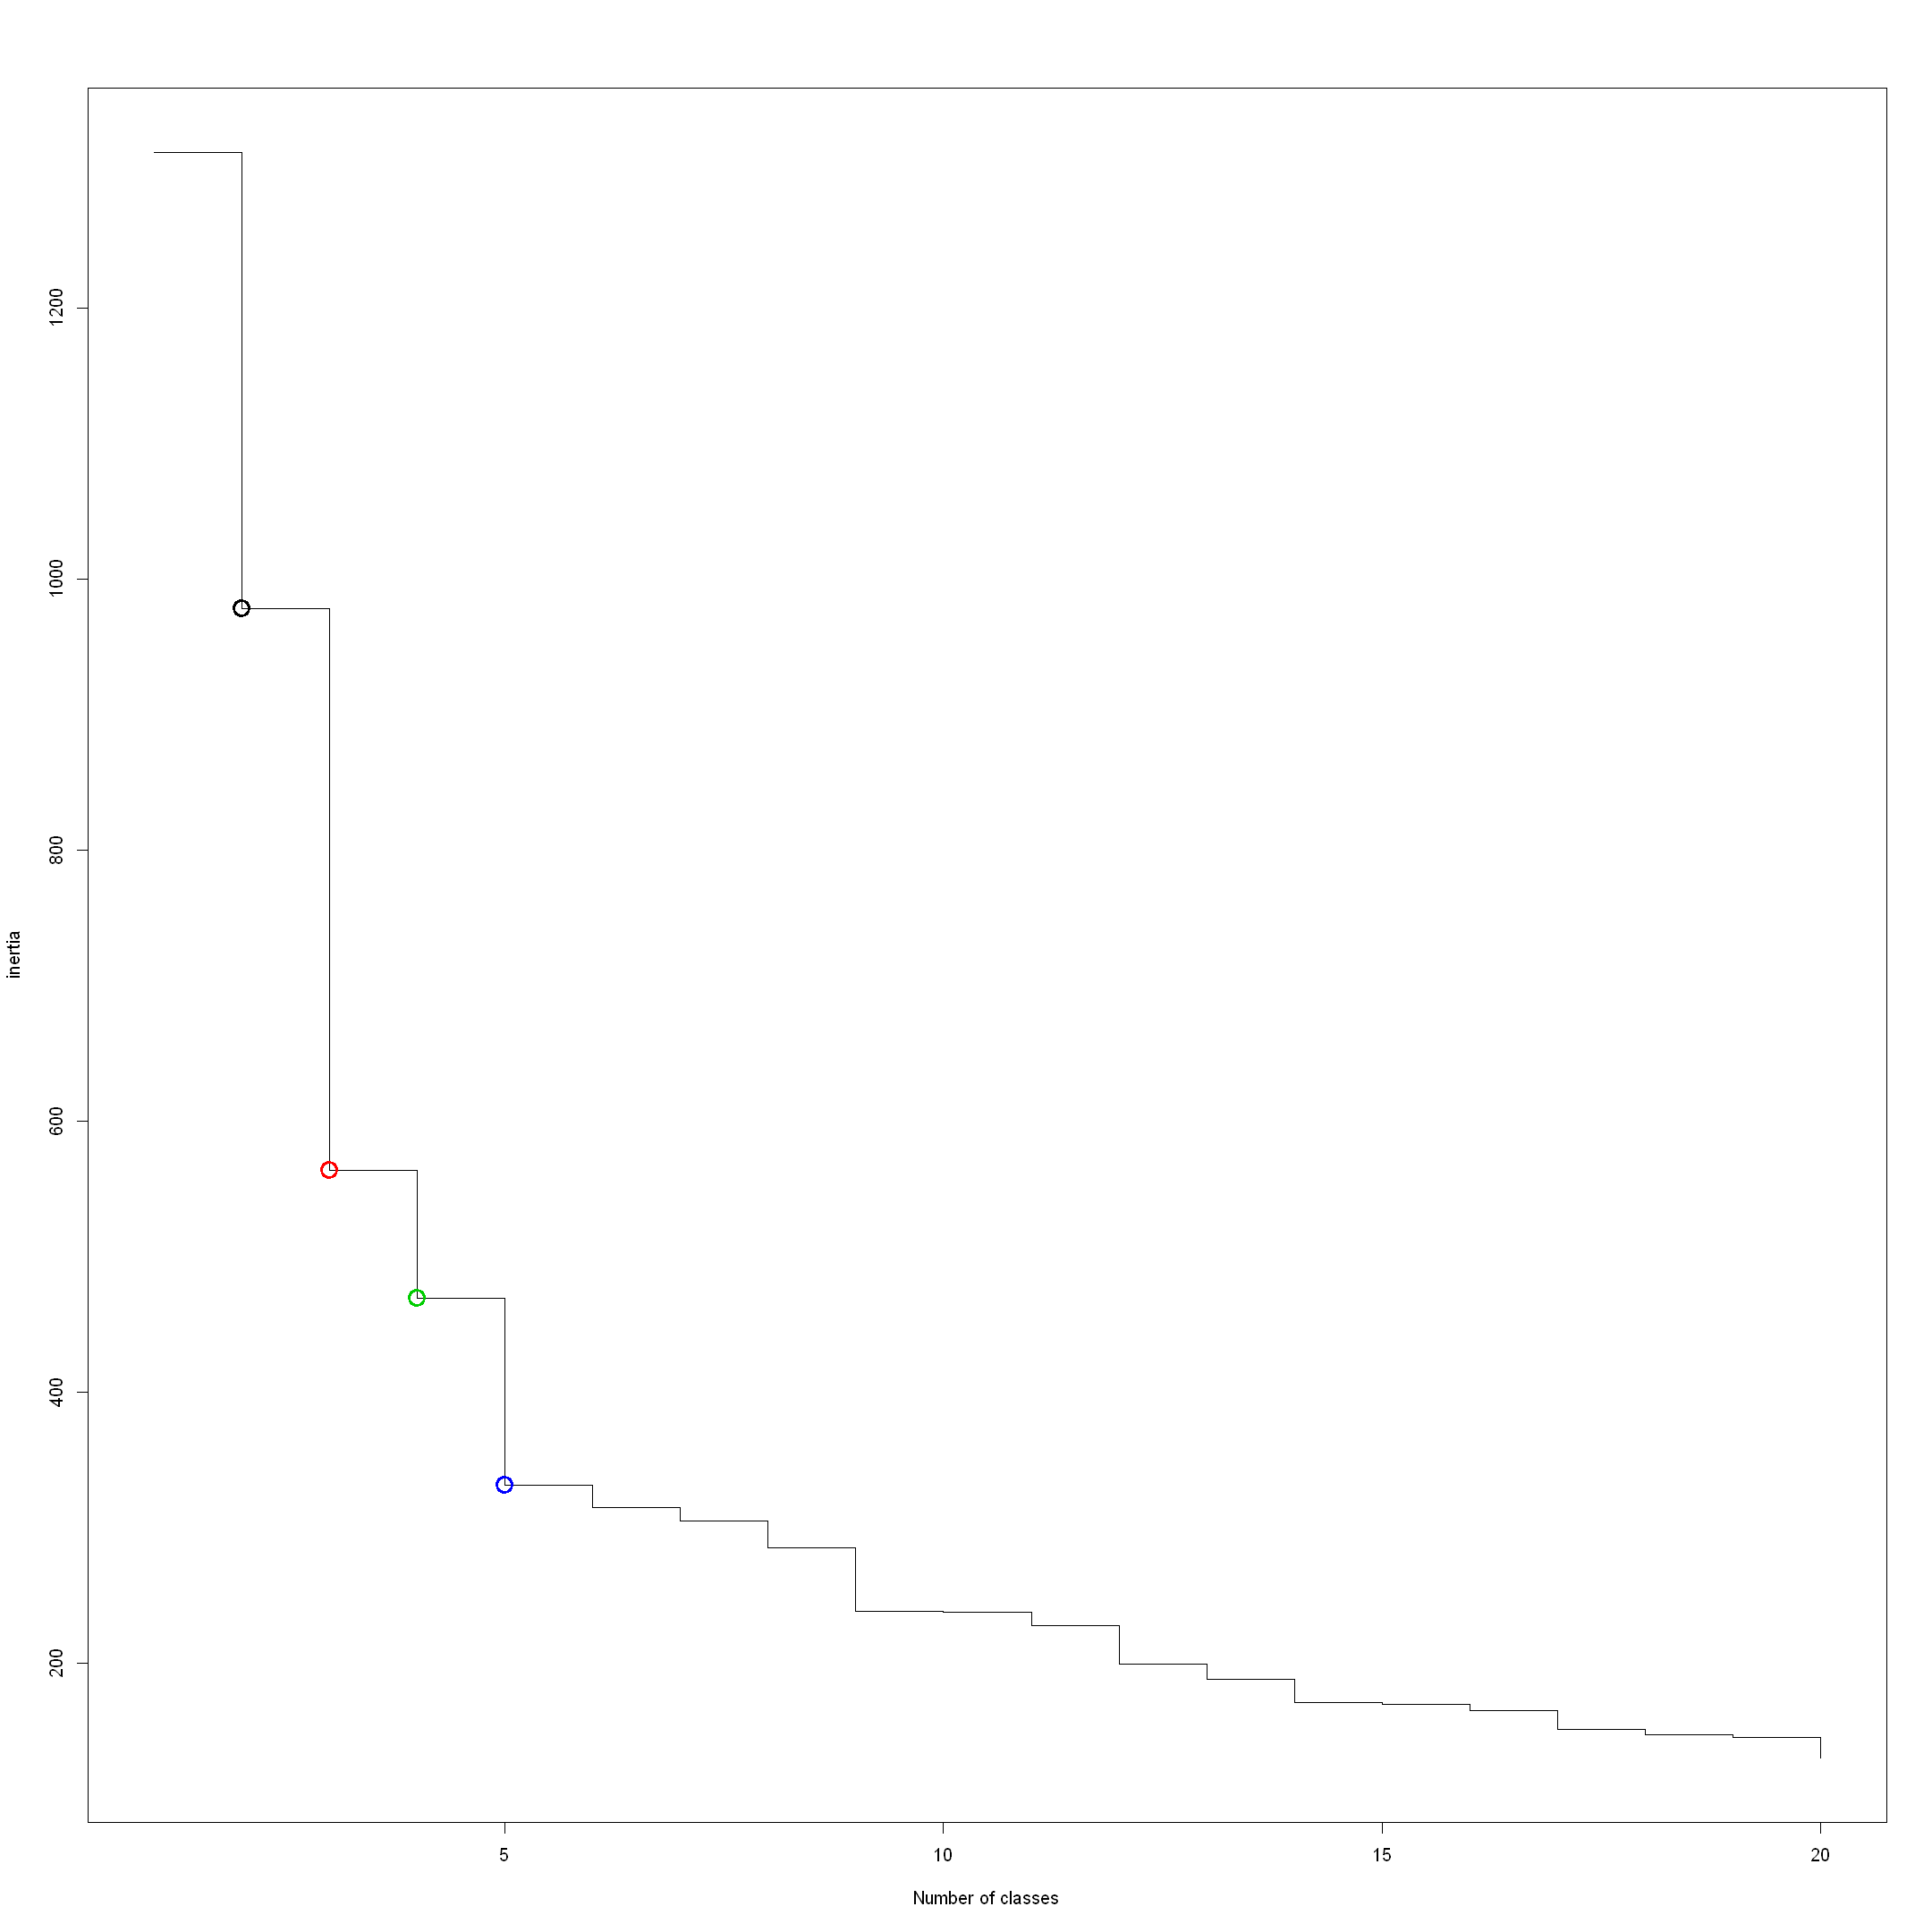

In [60]:
#clustering des équipes avec la méthode ward
clusters <- hclust(dist(NouvImp), method = "ward.D2", members = NULL)
#Saut d'inertie 
inertie <- sort(clusters$height, decreasing = TRUE)
plot(inertie[1:20], type = "s", xlab = "Number of classes", ylab = "inertia")
points(c(2, 3,4,5), inertie[c(2, 3,4,5)], col = c(1:4), cex = 2, lwd = 3)

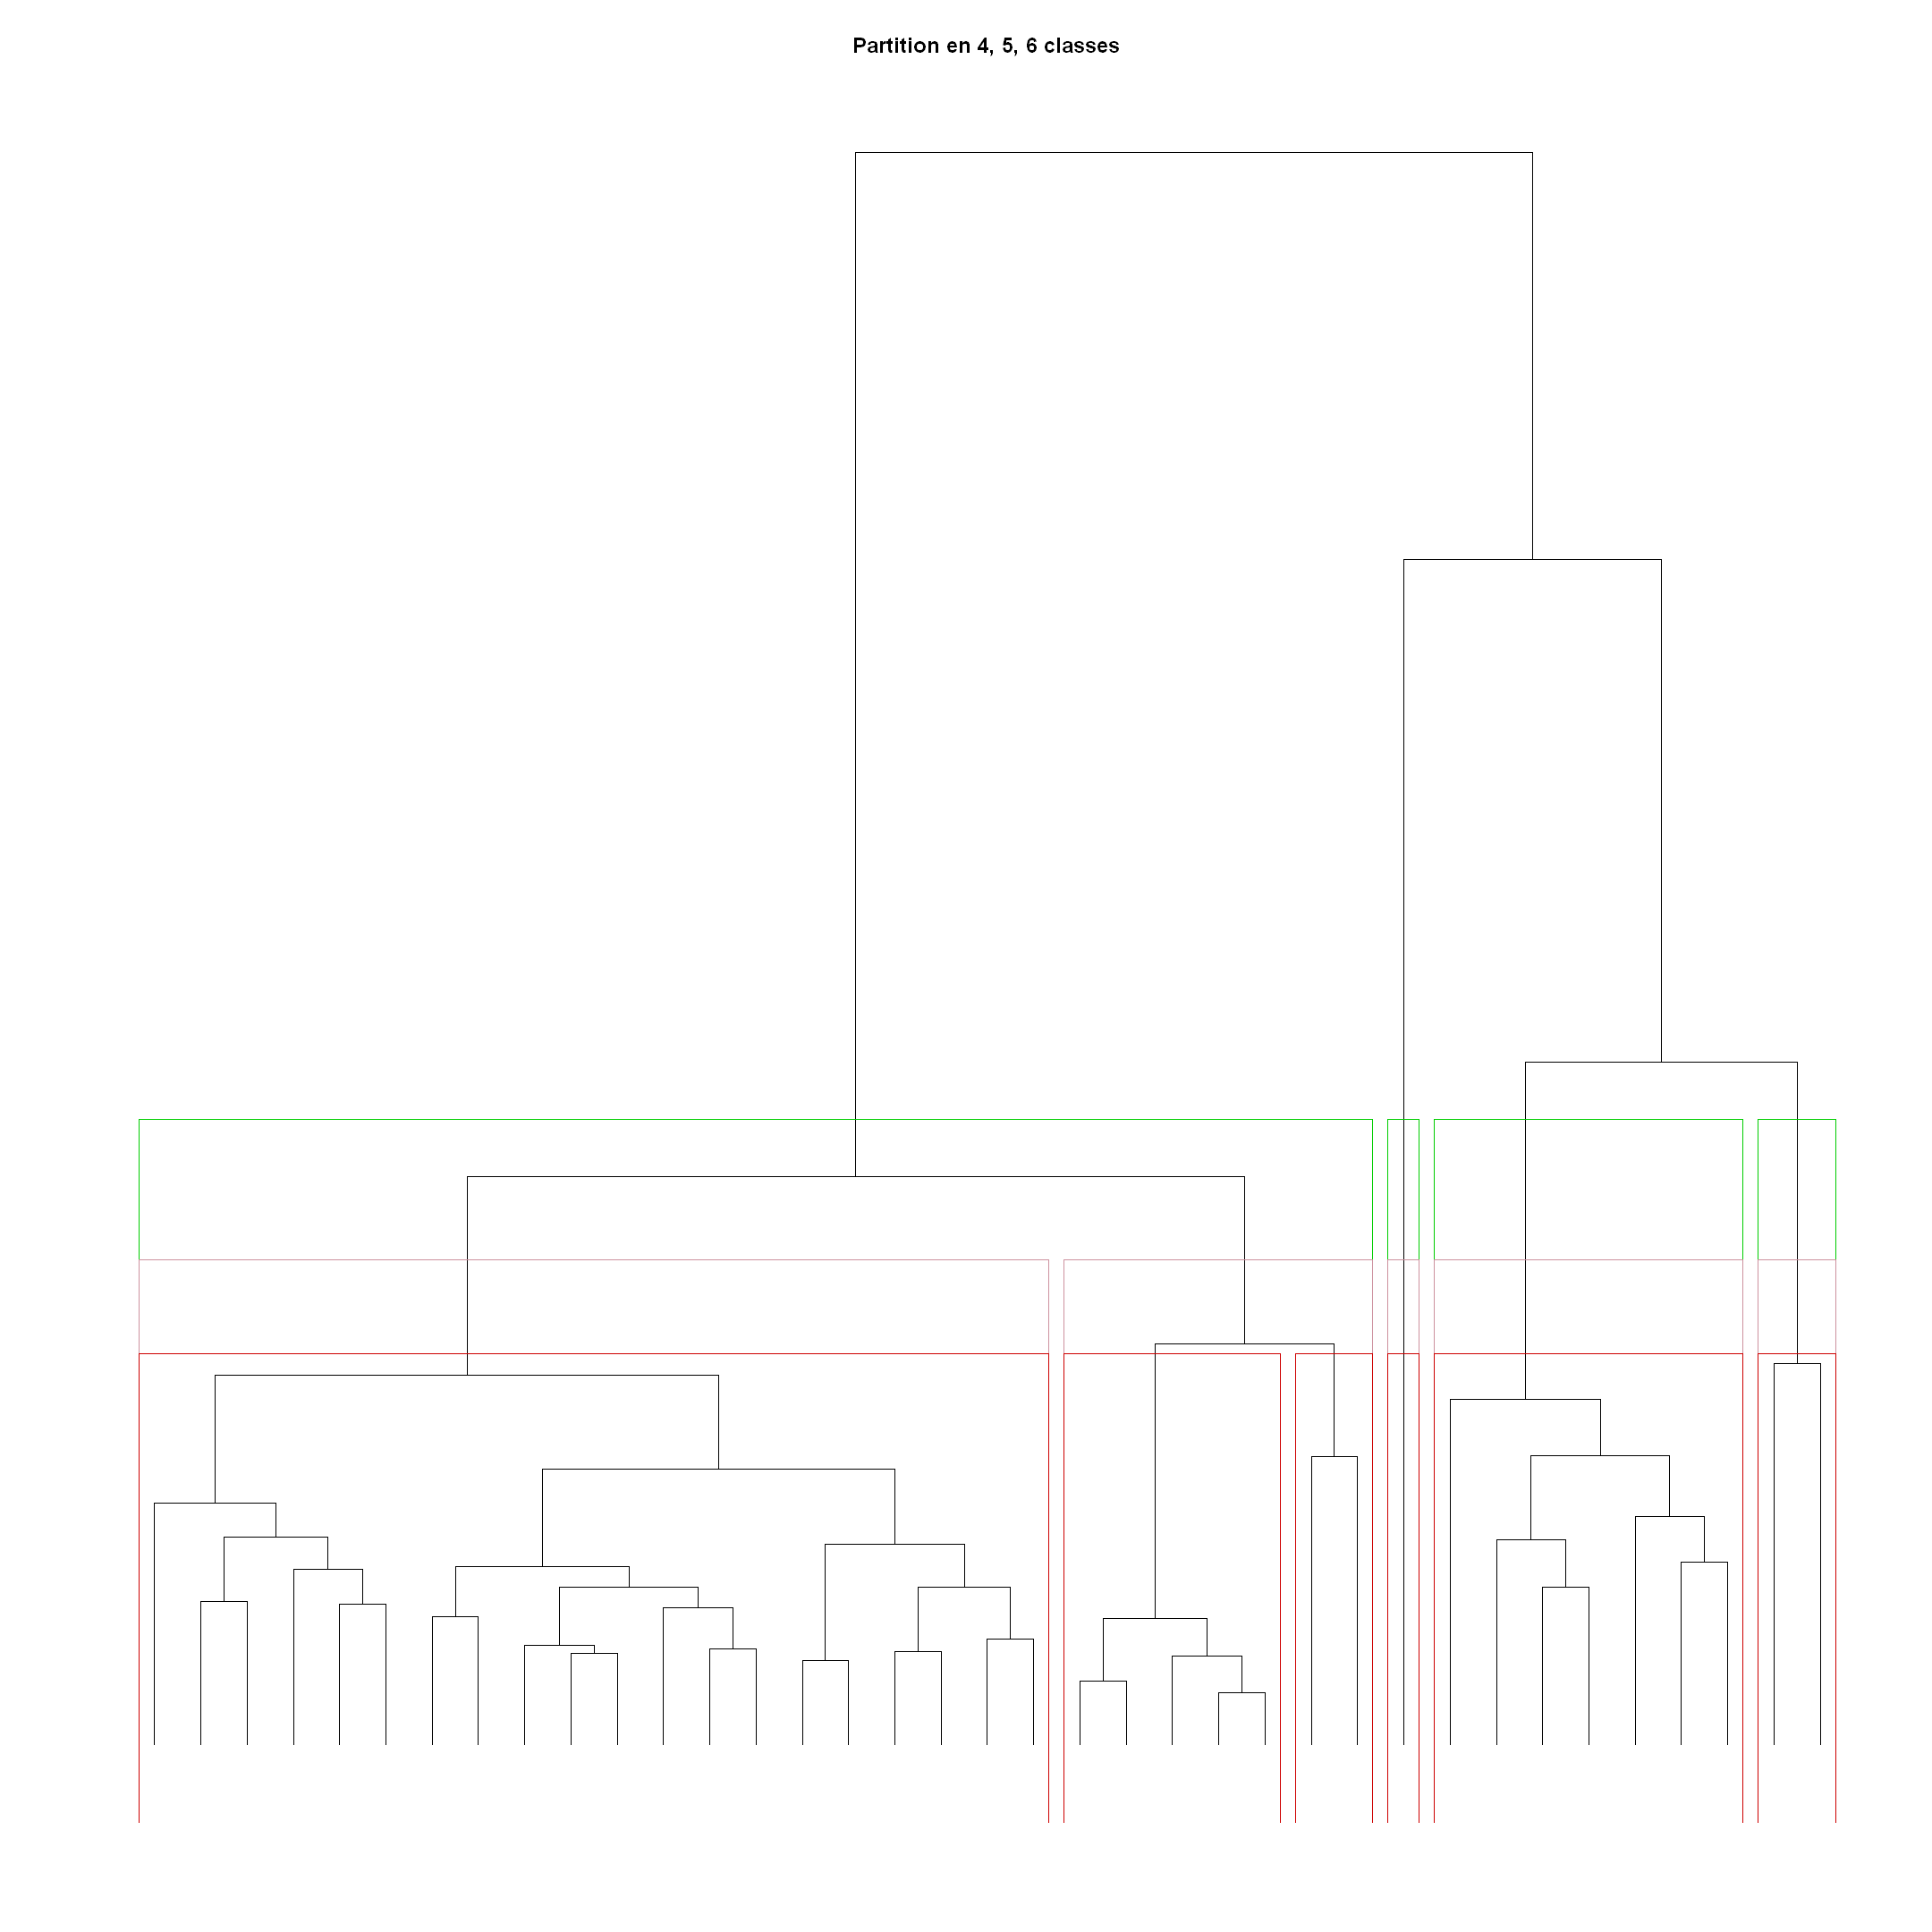

In [61]:
#regroupement en 4,5 ou 6 classes
plot(clusters, labels = FALSE, main = "Partition en 4, 5, 6 classes", 
  xlab = "", ylab = "", sub = "", axes = FALSE, hang = -1)
rect.hclust(clusters, 4, border = "green3")
rect.hclust(clusters, 5, border = "pink3")
rect.hclust(clusters, 6, border = "red3")

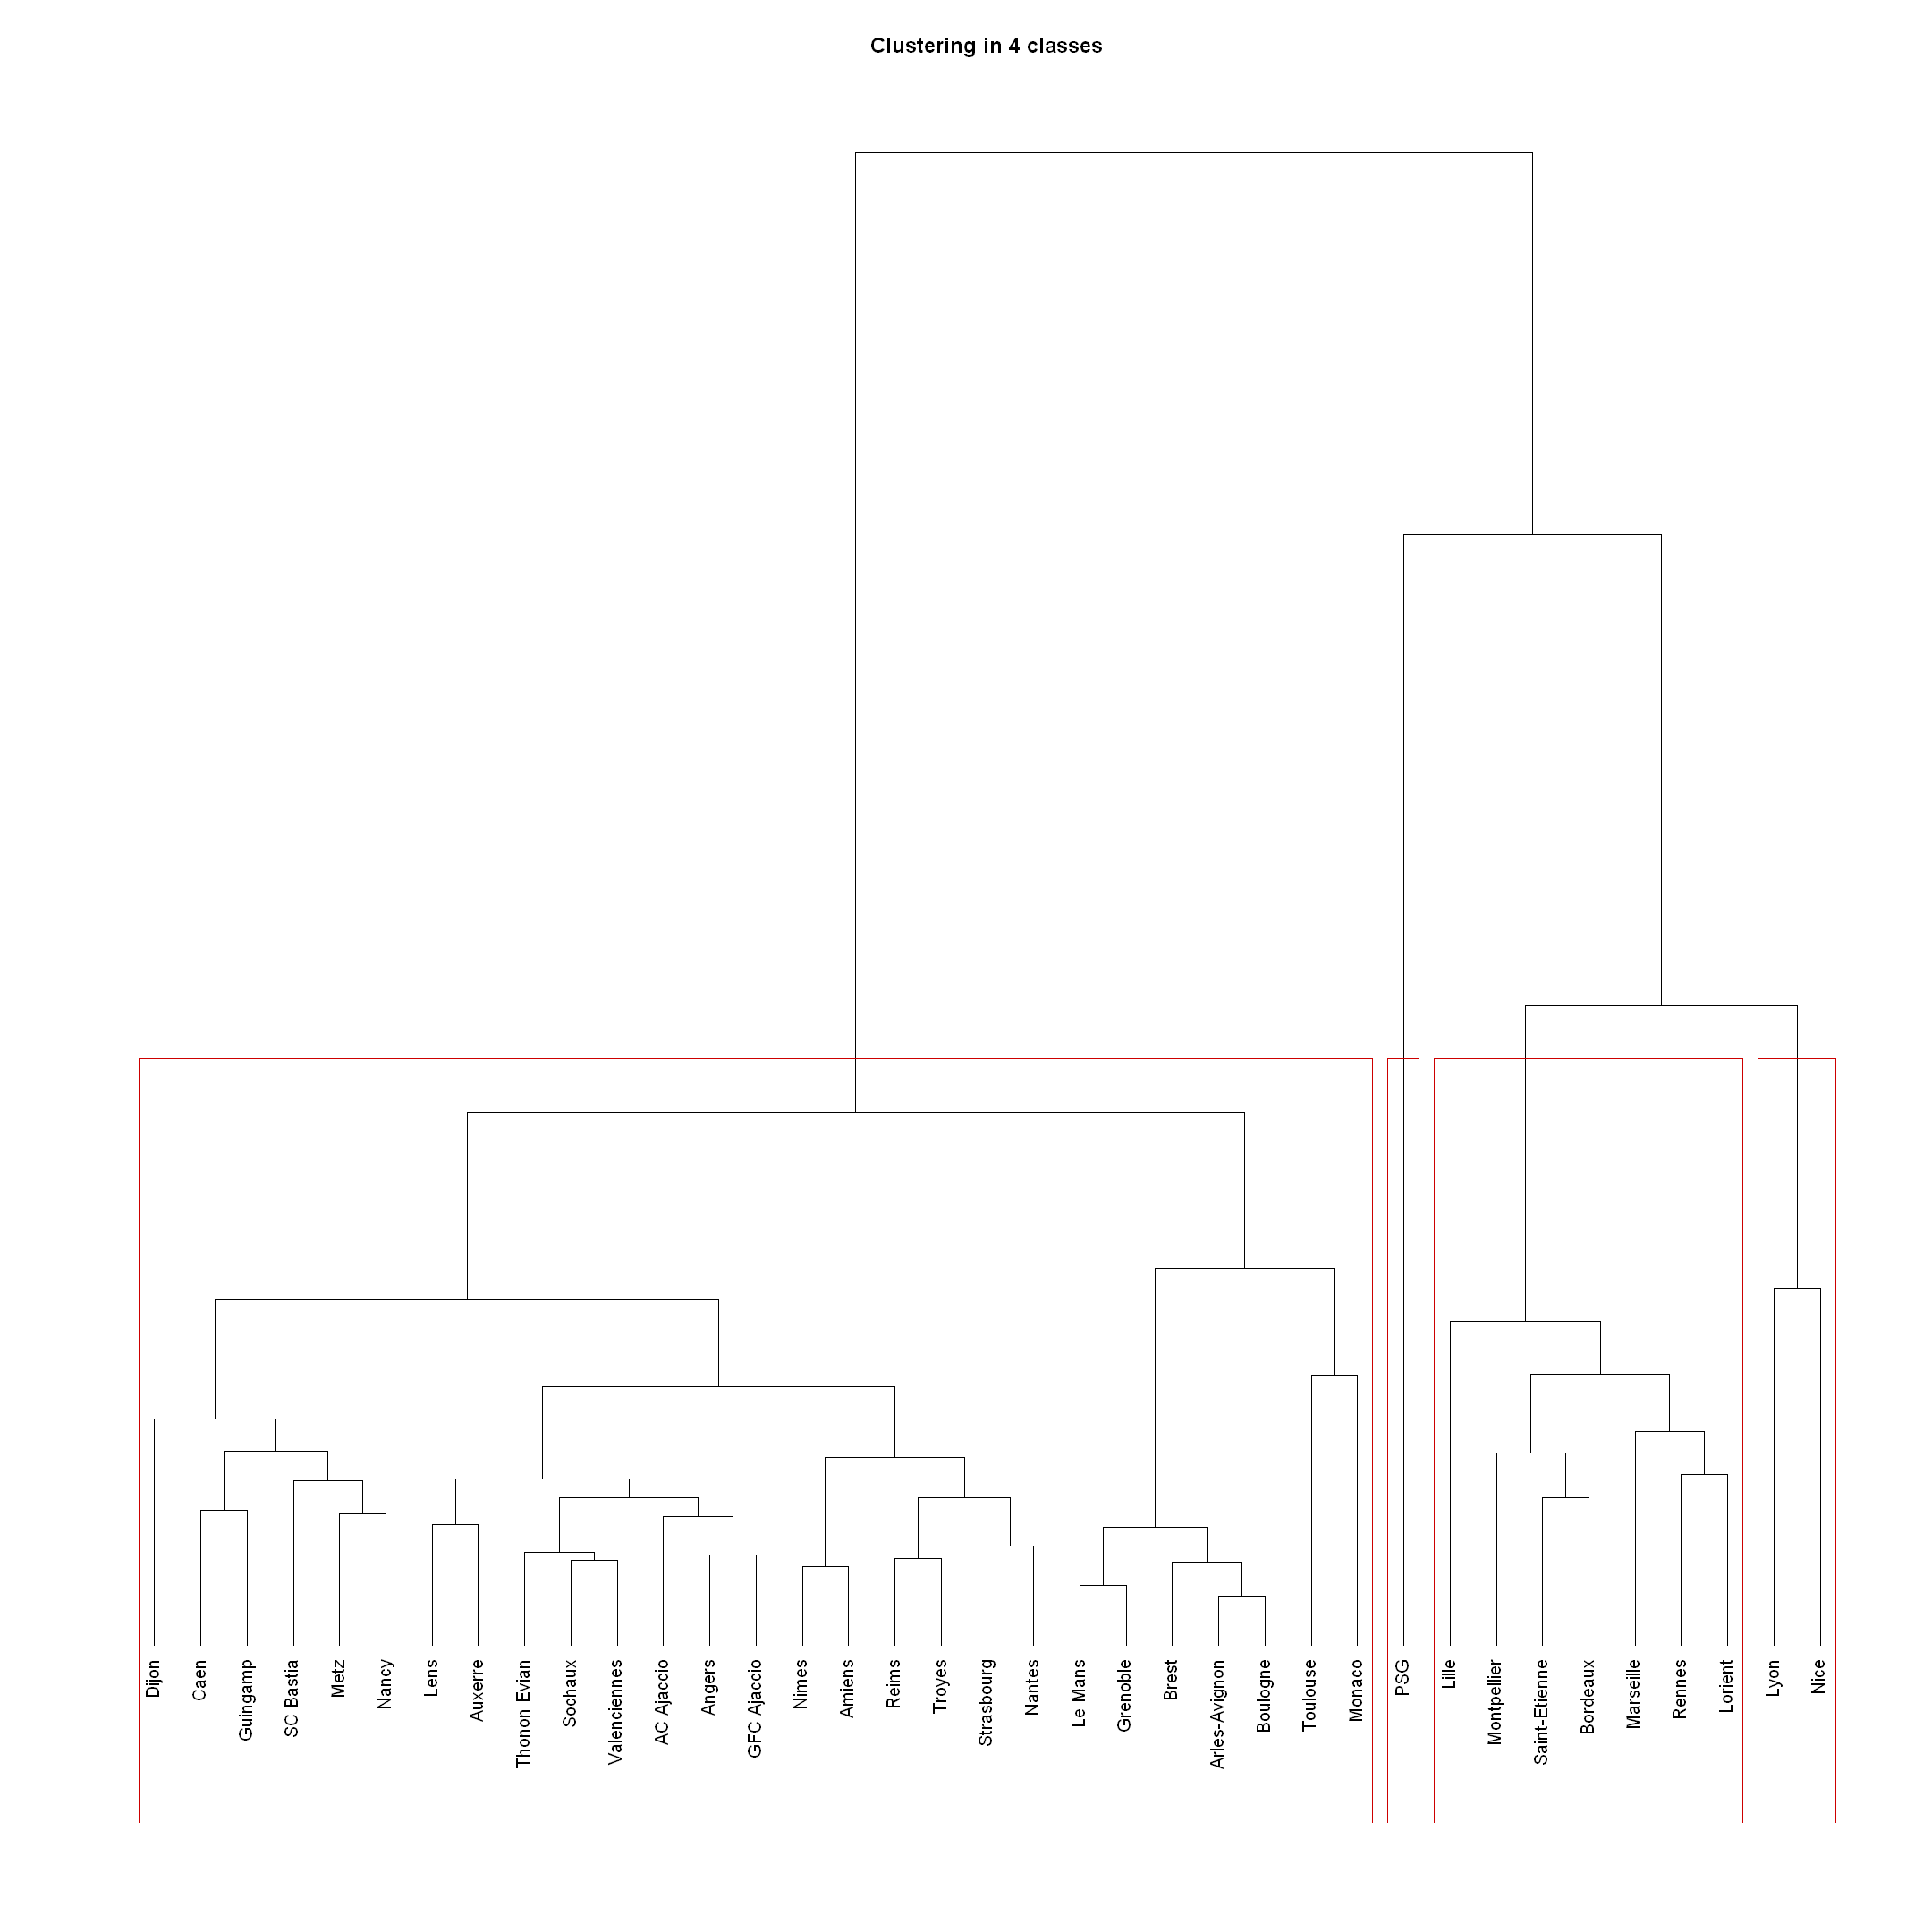

In [62]:
#regroupement final en 4 classes
plot(clusters, main = "Clustering in 4 classes", 
  xlab = "", ylab = "", sub = "", axes = FALSE, hang = -1)
rect.hclust(clusters, 4, border = "red3")

In [63]:
#affichage des différentes équipes et leur groupe 
groupes.cah <- cutree(clusters,k=4)
print(sort(groupes.cah))

          PSG          Lyon          Nice         Lille   Montpellier 
            1             2             2             3             3 
Saint-Etienne     Marseille        Rennes      Bordeaux       Lorient 
            3             3             3             3             3 
        Nimes    Strasbourg         Reims        Nantes        Angers 
            4             4             4             4             4 
     Toulouse        Monaco         Dijon          Caen        Amiens 
            4             4             4             4             4 
     Guingamp          Metz        Troyes         Nancy     SC Bastia 
            4             4             4             4             4 
  GFC Ajaccio          Lens  Thonon Evian       Sochaux  Valenciennes 
            4             4             4             4             4 
   AC Ajaccio         Brest       Auxerre Arles-Avignon      Boulogne 
            4             4             4             4             4 
      

Too few points to calculate an ellipse
Too few points to calculate an ellipse


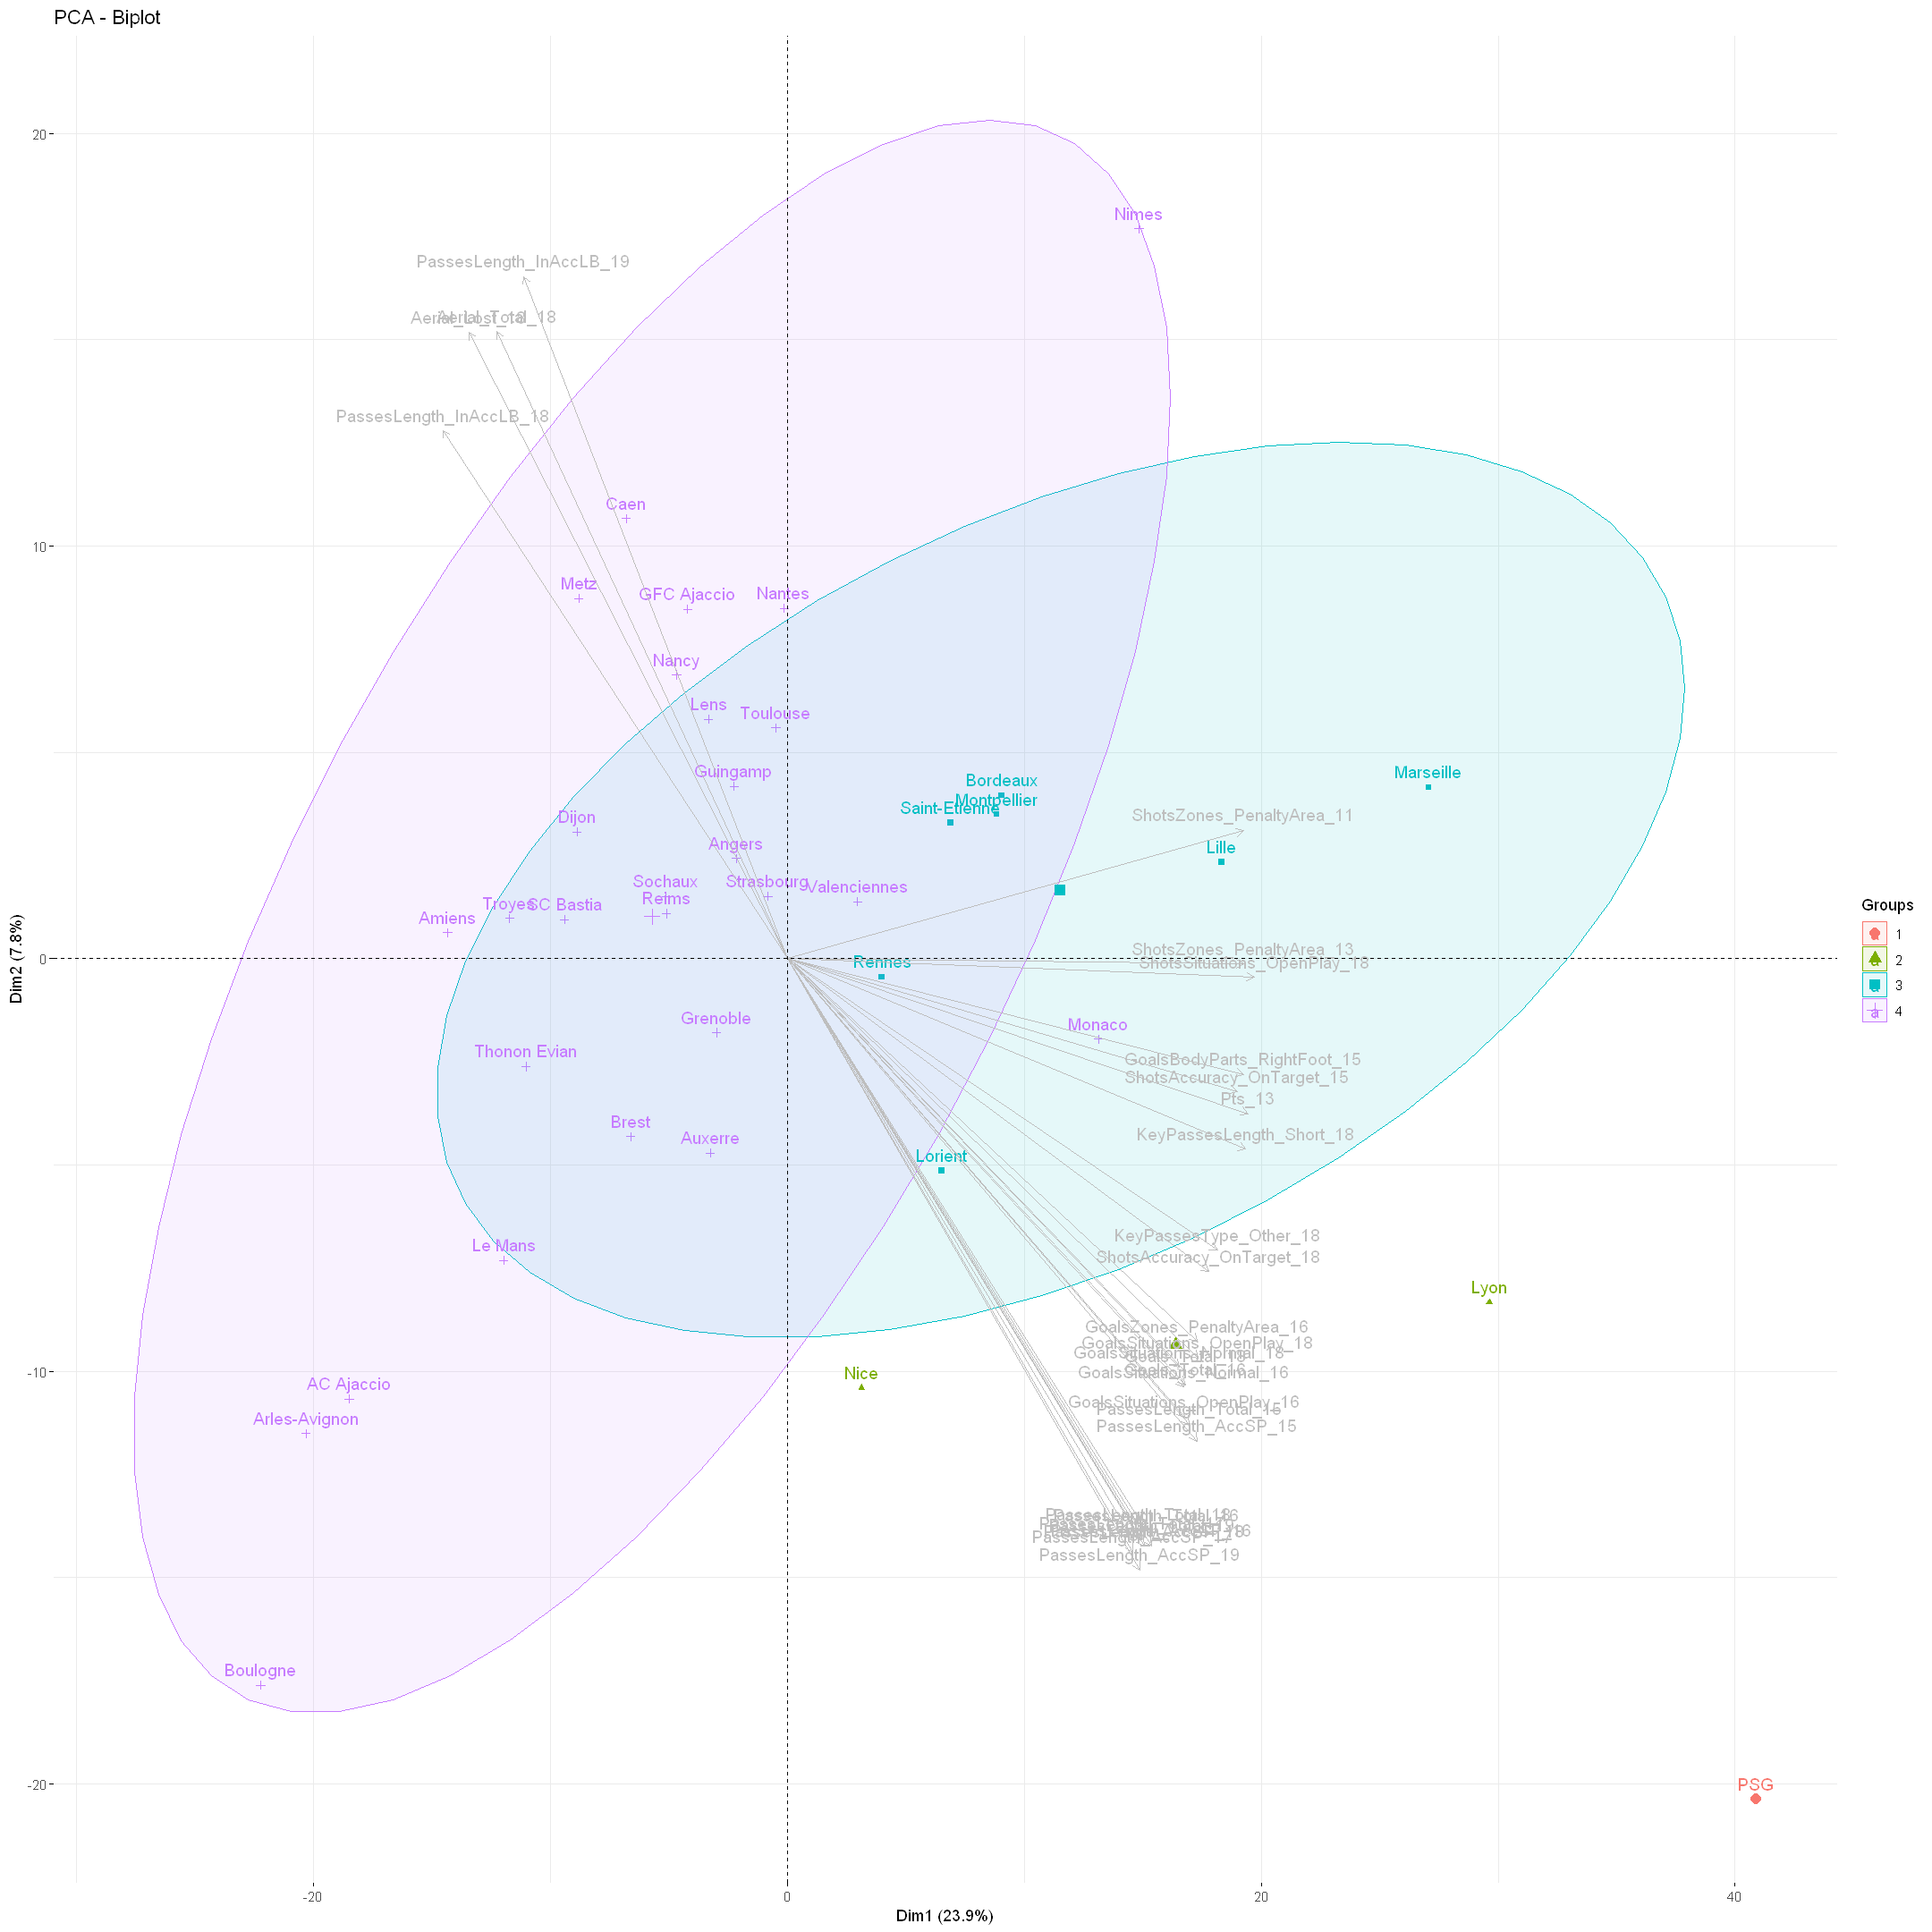

In [64]:
#Biplot PCA
pca_tot = PCA(NouvImp, scale.unit=T, graph=F, quali.sup = 81, quanti.sup = 82, ncp=2)
options(repr.plot.width=18, repr.plot.height=18)
fviz_pca_biplot(pca_tot, 
                col.var = "grey", # Variables color
                habillage = as.factor(groupes.cah), 
                col.quanti.sup = "red",
                col.circle = "darkslategrey",
                addEllipses = TRUE,select.var = list(cos2 = 0.7, contrib=30), 
                )

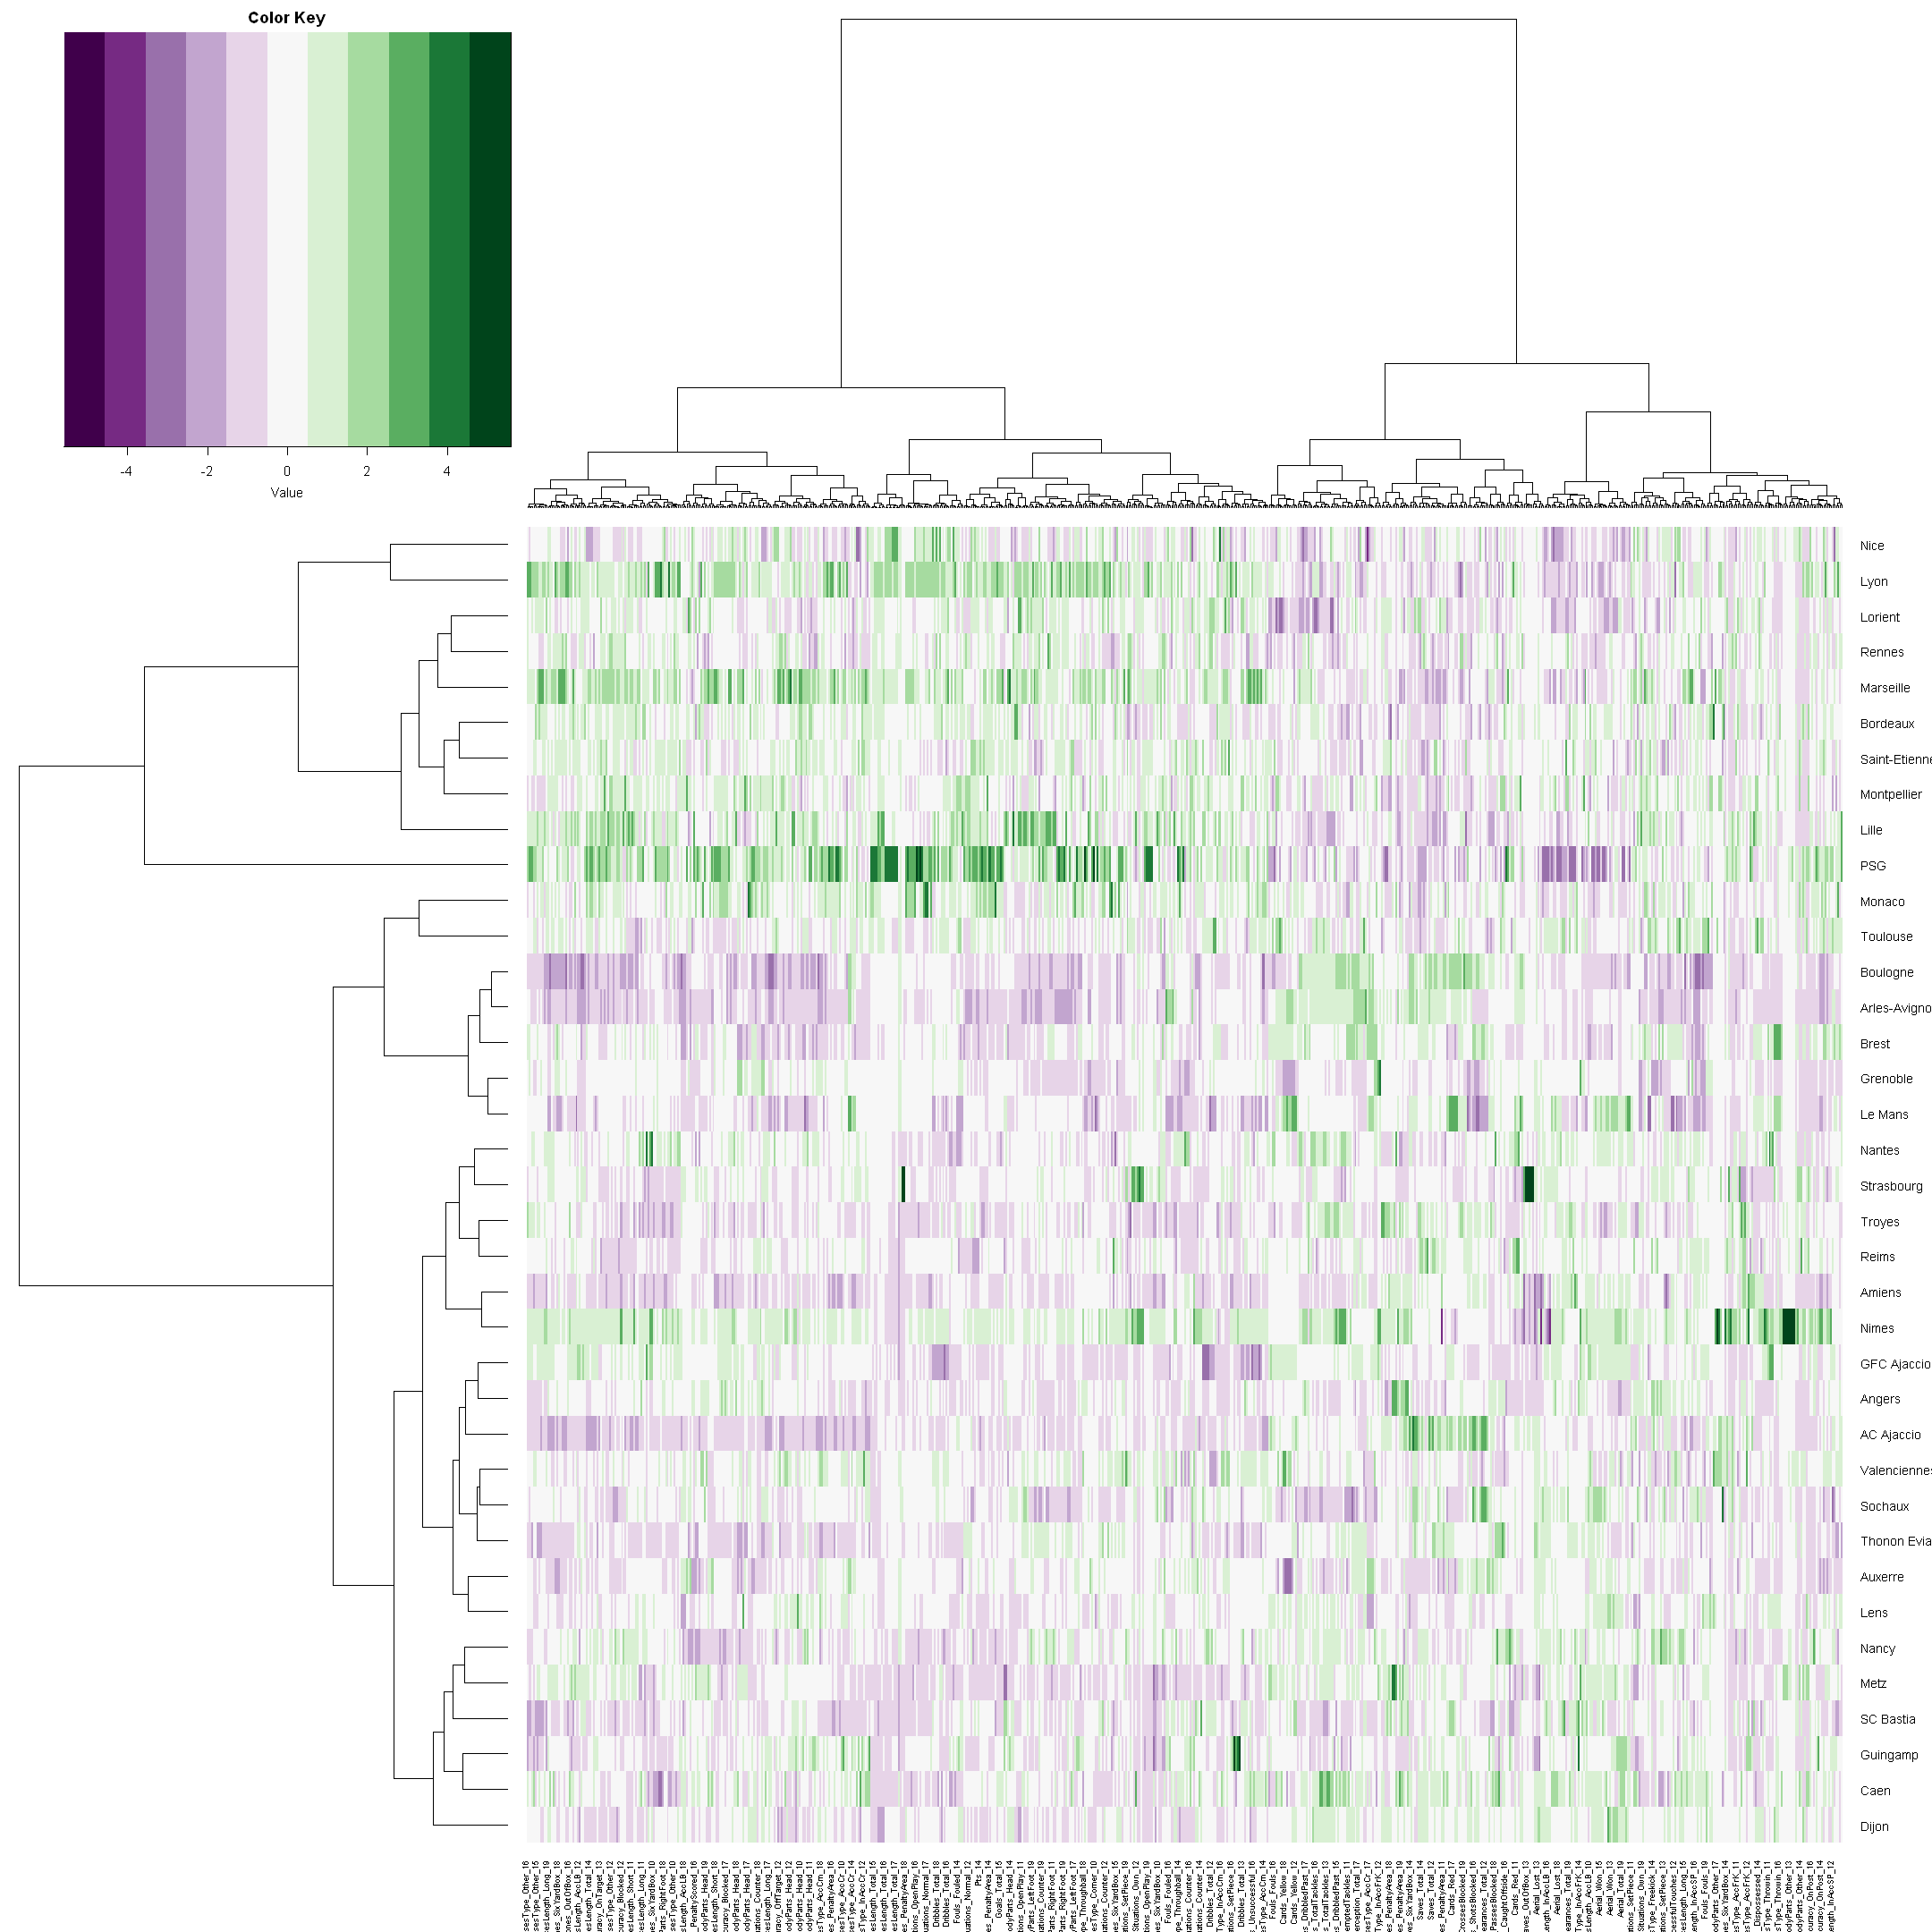

In [65]:
#HEATMAP
dist.var_var <- get_dist(t(NouvImp), method='spearman')
clas.var_var <- hclust(dist.var_var, method="ward.D")
color_var = cutree(clas.var_var,k=4)
options(repr.plot.width=18, repr.plot.height=18)

heatmap.2(as.matrix(scale(NouvImp)), Rowv = as.dendrogram(clusters), 
          Colv = as.dendrogram(clas.var_var), scale='none', col=brewer.pal(n = 11, name = "PRGn"), 
          density.info="none", trace="none")

In [66]:
#Autre méthode de classification : K-means
groupes.kmeans <- kmeans(dist(NouvImp),centers=4,nstart=3)
print((groupes.kmeans))

#Comparaison de k-means et hclust
print(table(groupes.cah,groupes.kmeans$cluster))

K-means clustering with 4 clusters of sizes 9, 23, 4, 1

Cluster means:
        PSG     Lyon    Lille Montpellier Saint-Etienne Marseille     Nice
1  848.3740 385.7404 280.6342    162.7304      147.5560  236.7010 443.4901
2 1001.8829 533.1888 419.2928    197.3619      228.0039  365.5565 531.8258
3  641.2062 211.7486 259.3752    353.3355      307.4827  188.6045 276.5364
4    0.0000 524.9905 761.4990    900.6457      835.5315  686.1108 592.2244
      Nimes   Rennes Strasbourg    Reims   Nantes   Angers Bordeaux Toulouse
1  256.3267 164.5065   175.9179 219.5411 197.3609 221.6746 164.1973 211.8778
2  149.4438 265.0140   139.6198 131.7251 126.0051 114.5576 272.7049 237.7233
3  492.7192 298.2780   400.0052 457.1843 426.4680 447.8397 300.0106 443.5128
4 1038.6210 804.5575   939.9739 989.1861 965.2494 997.5455 811.0192 958.5102
    Monaco     Dijon      Caen    Amiens  Guingamp      Metz   Troyes     Nancy
1 199.4182  336.9220  324.1046  248.2974  285.8503  288.0715 215.3399  255.7795
2 295.91

## Analyse longitudinale 

In [42]:
newtot <- read.csv("Totalreverse.csv",sep="\t",header = TRUE,row.names=2)
head(newtot)
nt<-t(newtot)

,X.1,Tackles_TotalTackles_19,Tackles_TotalTackles_18,Tackles_TotalTackles_17,Tackles_TotalTackles_16,Tackles_TotalTackles_15,Tackles_TotalTackles_14,Tackles_TotalTackles_13,Tackles_TotalTackles_12,Tackles_TotalTackles_11,...,Pts_19,Pts_18,Pts_17,Pts_16,Pts_15,Pts_14,Pts_13,Pts_12,Pts_11,Pts_10
PSG,1,18.4,16.9,17.2,20.3,20.6,18.5,19.4,20.4,19.3,...,91,93,87,96,83,89,83,79,60,47
Lyon,2,16.8,16.9,19.8,21.4,19.2,18.5,19.0,17.1,21.2,...,72,78,64,65,75,61,67,64,64,72
Lille,3,16.5,17.9,17.3,19.8,17.6,18.6,16.0,18.0,20.2,...,72,38,46,60,56,71,62,74,76,70
Montpellier,4,20.0,17.9,16.7,18.3,21.9,19.8,17.7,18.4,20.2,...,59,51,39,49,56,42,52,82,47,69
Saint-Etienne,5,17.7,17.8,18.6,20.4,19.0,19.1,19.4,21.2,20.3,...,66,55,50,58,69,69,63,57,49,40
Marseille,6,20.5,19.4,19.2,19.7,19.9,19.0,19.1,18.5,19.5,...,61,77,62,48,69,60,71,48,68,78


In [43]:
library(tidyverse)
graphe<-function(data,variable,equipe) {
  var<-str_sub(variable,1,str_length(variable)-3)
  vari<-str_sub(variable,1,str_length(variable)-2)
  for (i in seq(11,19)){
    c<-str_c(vari,i)
    h<-c(variable,c)
    variable<-h
  }
  a<-data[,equipe]
  b<-a[h,]
  matplot(seq(2010,2019),b,lty ="solid",pch=c(1,2),col = c(1:10),type="l",xlab = "Years", ylab = var)
  m<-floor(max(nt[h,equipe]))
legend(2010,1.5,legend=equipe, col=c(1:10),lty=1, cex=0.5)
  abline(v=seq(2010,2019),col="lightgrey",lty=2)
}

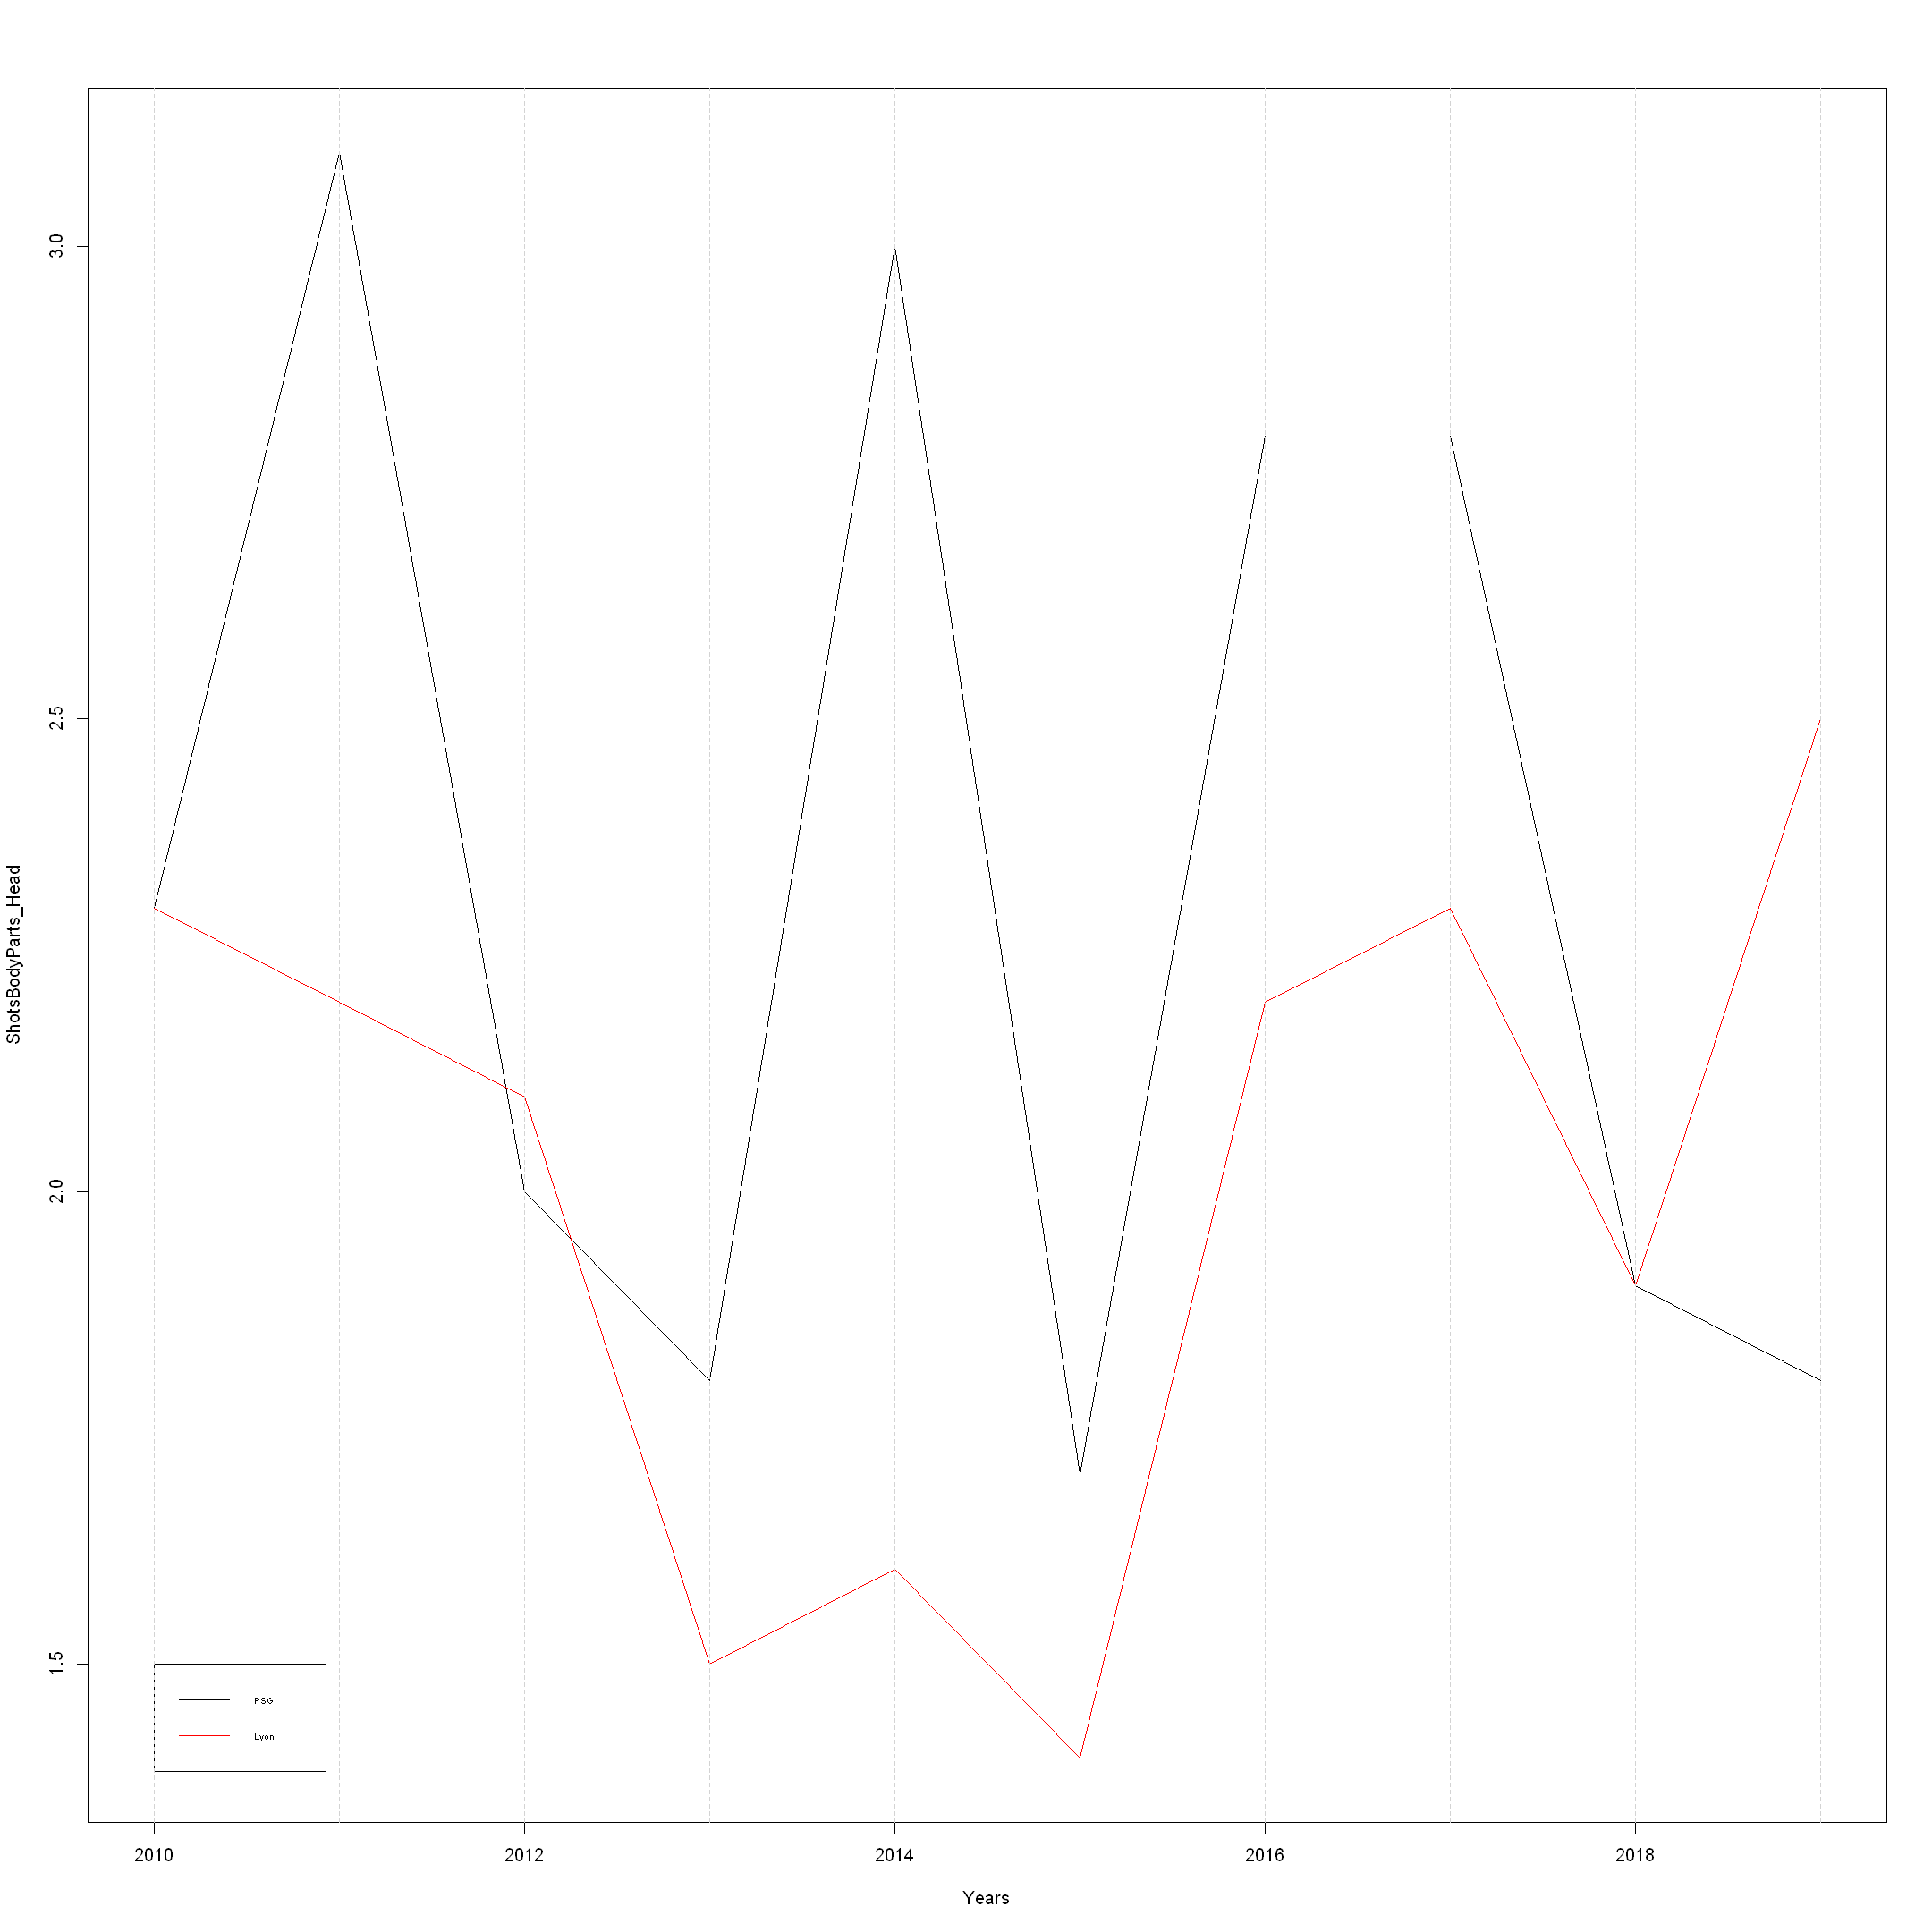

In [44]:
graphe(nt,"ShotsBodyParts_Head_10",c("PSG","Lyon"))